In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Assignment1.csv')
y1=data.iloc[:-3,3].interpolate(method='polynomial', order=5)
y2=data.iloc[:-3,4].interpolate(method='polynomial', order=7)
data.iloc[0,5]=0.1
data.iloc[0,9]=0.1
data.iloc[8639,8]=0.1
data.iloc[8639,9]=0.1
y3=data.iloc[:-3,5].interpolate(method='polynomial', order=7)
y4=data.iloc[:-3,6].interpolate(method='polynomial', order=7)
y5=data.iloc[:-3,7].interpolate(method='polynomial', order=7)
y6=data.iloc[:-3,8].interpolate(method='polynomial', order=7)
y7=data.iloc[:-3,9].interpolate(method='polynomial', order=7)
y8=data.iloc[:-3,10].interpolate(method='polynomial', order=7)
y9=data.iloc[:-3,11].interpolate(method='polynomial', order=5)
y10=data.iloc[:-3,12].interpolate(method='polynomial', order=5)

In [ ]:
# l=[]
# m1=np.mean(y1)
# m2=np.mean(y2)
# m3=np.mean(y3)
# m4=np.mean(y4)
# m5=np.mean(y5)
# m6=np.mean(y6)
# m7=np.mean(y7)
# m8=np.mean(y8)
# m9=np.mean(y9)
# m10=np.mean(y10)
# m= m1+m2+m3+m6+m7+m8+m9+m10
# for i in range(0, 8640):
#   l.append((y1[i]*(m1/m))+(y2[i]*(m2/m))+(y3[i]*(m3/m))+(y6[i]*(m6/m))+(y7[i]*(m7/m))+(y8[i]*(m8/m))+(y9[i]*(m9/m))+(y10[i]*(m10/m)))
# lk=[]
# for i in range(0, 8640, 96):
#   a=0
#   p=-5000000
#   for j in range(i, i+96):
#     if(l[j]>p):
#       p=l[j]
#       a=j-i
#   lk.append(a)
# print(lk)

In [ ]:
# from collections import Counter

# # my_list = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5]

# # Use Counter to count the frequency of elements
# frequency = Counter(lk)

# # Print the frequency of each element
# for element, count in frequency.items():
#     print(f"{element}: {count}")


In [ ]:
# import matplotlib.pyplot as plt
# plt.hist(lk, bins=90)
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Histogram of My List')
# plt.show()

In [ ]:
from scipy.stats import norm
import scipy
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
d = {'PM10': y1, 'PM2.5': y2, 'NO': y3, 'NO2': y4, 'NOX': y5, 'CO': y6, 'SO2': y7, 'NH3': y8, 'Ozone': y9, 'Benzene': y10}
df = pd.DataFrame(d)
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
weights = np.ones(df.shape[1])
def optimize_weights(weights):
    combined_data = np.dot(df, weights)
    print(combined_data)
    _, qq = norm.fit(combined_data)
    _, p_value = scipy.stats.normaltest(combined_data)
    return abs(qq) + p_value
from scipy.optimize import minimize
result = minimize(optimize_weights, weights, method='Nelder-Mead')
optimized_weights = result.x
combined_data = np.dot(df, optimized_weights)
print(combined_data)

[4.04660644 4.04429934 4.04004207 ... 4.05064911 4.05164647 4.05828564]
[4.04685633 4.04454923 4.04029195 ... 4.05086457 4.05186193 4.058507  ]
[4.04669391 4.04438681 4.04012954 ... 4.05072953 4.05172689 4.05836459]
[4.04660644 4.04516984 4.04177272 ... 4.05064911 4.05164647 4.05828564]
[4.0964231  4.09410505 4.08984622 ... 4.10051839 4.10151575 4.10814763]
[4.09590895 4.09359481 4.08933818 ... 4.1000348  4.10103856 4.10767838]
[4.04703867 4.04473265 4.04047807 ... 4.05109591 4.05209327 4.05870653]
[4.09660644 4.09342779 4.08830933 ... 4.10064911 4.10164647 4.10828564]
[4.04699623 4.04469413 4.04044855 ... 4.05097876 4.05197863 4.05861947]
[4.05837275 4.05596324 4.05148066 ... 4.06256903 4.06360736 4.07060496]
[4.08689194 4.08458483 4.08032756 ... 4.09093433 4.09193169 4.09857086]
[4.03872992 4.03639974 4.0320999  ... 4.04281334 4.04382067 4.05052624]
[4.01464891 4.0123072  4.00798607 ... 4.01875284 4.01976517 4.02650393]
[4.07232404 4.06998695 4.06567433 ... 4.07646074 4.07747107 4.08

In [ ]:
lk=[]
print(optimized_weights)
for i in range(0, 8640, 96):
  a=0
  p=-5000000
  for j in range(i, i+96):
    if(combined_data[j]>p):
      p=combined_data[j]
      a=j-i
  lk.append(a)
print(lk)

[-2.16910089e-04  4.34793008e-01  4.76071603e+00  7.70320461e-01
 -5.73997827e-01 -1.60988284e+00  4.76905544e+00  1.36324929e+00
 -8.69758042e-03 -1.28121956e-03]
[4, 71, 84, 44, 65, 52, 42, 43, 45, 60, 46, 73, 85, 67, 45, 44, 48, 43, 95, 34, 34, 58, 89, 62, 48, 87, 86, 79, 48, 64, 38, 1, 56, 36, 42, 49, 48, 48, 44, 67, 44, 63, 48, 48, 36, 48, 48, 48, 2, 48, 48, 48, 81, 21, 48, 48, 51, 48, 48, 95, 36, 34, 30, 31, 48, 64, 48, 48, 80, 48, 85, 47, 49, 48, 55, 81, 34, 30, 15, 81, 10, 31, 49, 80, 80, 48, 91, 91, 48, 48]


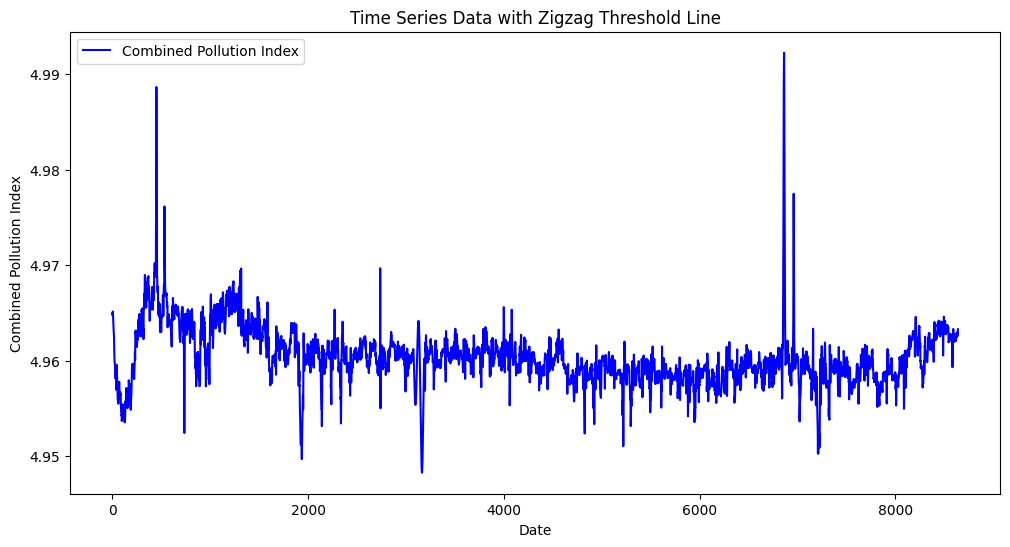

<Figure size 600x600 with 0 Axes>

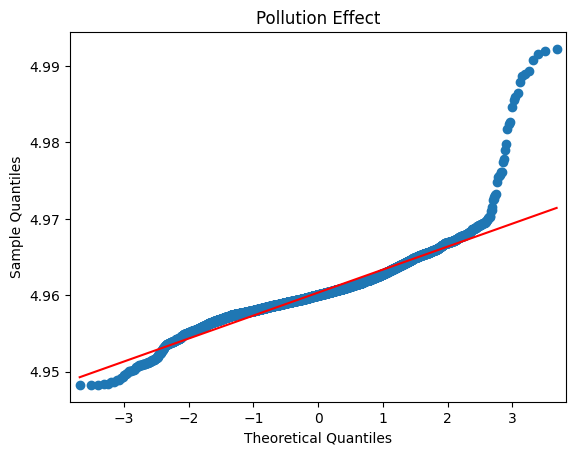

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(0,8640), combined_data, color='blue', label='Combined Pollution Index')
plt.xlabel('Date')
plt.ylabel('Combined Pollution Index')
plt.title('Time Series Data with Zigzag Threshold Line')
plt.legend()
plt.show()

import statsmodels.api as sm
plt.figure(figsize=(6, 6))
fig, ax=plt.subplots()
sm.qqplot(combined_data, line='s', ax=ax)
ax.set_title('Pollution Effect')
plt.show()

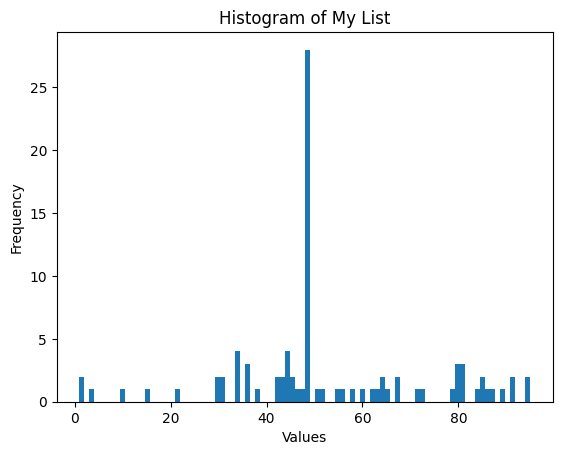

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lk, bins=90)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of My List')
plt.show()

In [ ]:
from collections import Counter
frequency = Counter(lk)
for element, count in frequency.items():
    print(f"{element}: {count}")

4: 1
71: 1
84: 1
44: 4
65: 1
52: 1
42: 2
43: 2
45: 2
60: 1
46: 1
73: 1
85: 2
67: 2
48: 25
95: 2
34: 4
58: 1
89: 1
62: 1
87: 1
86: 1
79: 1
64: 2
38: 1
1: 1
56: 1
36: 3
49: 3
63: 1
2: 1
81: 3
21: 1
51: 1
30: 2
31: 2
80: 3
47: 1
55: 1
15: 1
10: 1
91: 2


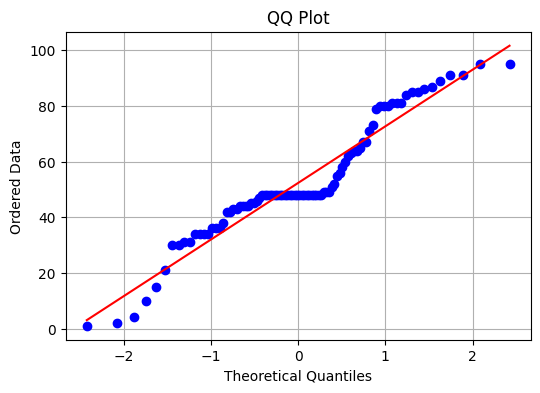

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(data)))
sorted_data = np.sort(lk)
plt.figure(figsize=(6, 4))
stats.probplot(lk, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Data')
plt.grid(True)
plt.show()

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
plt.style.use('fivethirtyeight')

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(combined_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:52188.721535816585
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:40250.16557469141
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-79610.49834172157
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-79965.00274852301
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-79618.23271623507
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-79531.59973410246
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-80281.12762092396
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-79845.23236555679
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:40219.946589759005
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:28298.445387710093
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-87518.17953094238
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-88420.77651799783
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-79335.7545991046
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-91095.27487614682
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-88790.84402487258
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-88305.93656015741
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-104736.52585572863
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-104586.7575

In [ ]:
mod = sm.tsa.statespace.SARIMAX(combined_data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0792      0.008      9.989      0.000       0.064       0.095
ma.L1          0.4530      0.007     64.596      0.000       0.439       0.467
sigma2      2.463e-07   9.25e-10    266.241      0.000    2.44e-07    2.48e-07


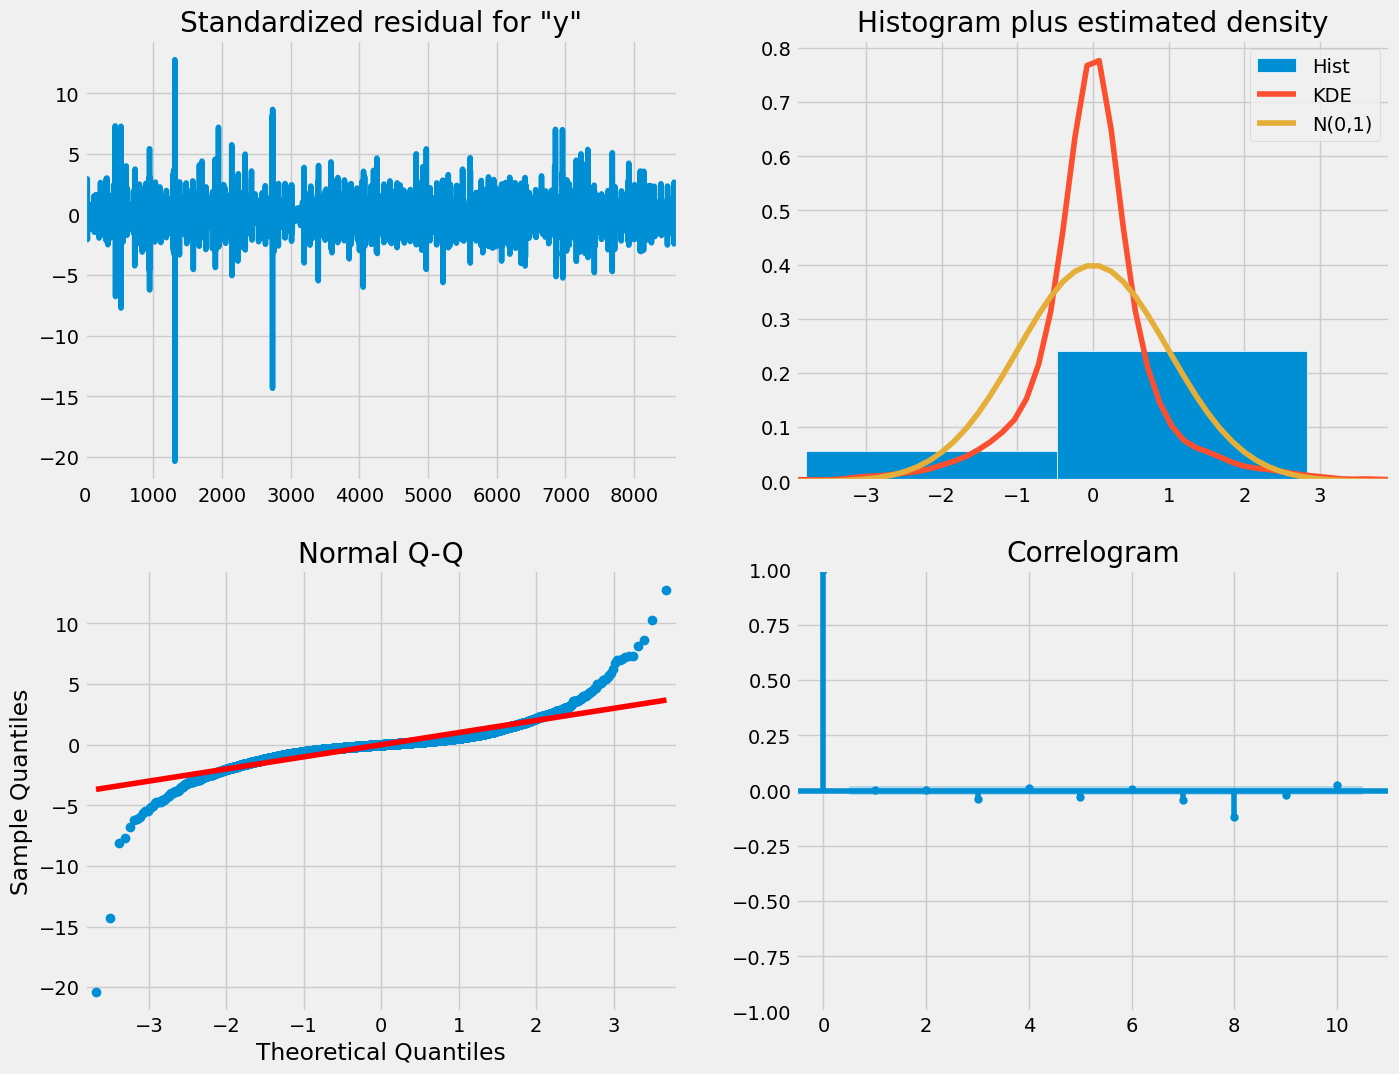

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
series = pd.Series(combined_data)
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 'n' steps
n = 864
forecast = model_fit.forecast(steps=n)
print("Forecasted Values:")
print(forecast)

# Plot the original data and the forecasted values
# plt.plot(series, label='Original Data')
# plt.plot(forecast[0], label='Forecasted Data')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

Forecasted Values:
8640    4.963646
8641    4.963675
8642    4.963677
8643    4.963677
8644    4.963677
          ...   
9499    4.963677
9500    4.963677
9501    4.963677
9502    4.963677
9503    4.963677
Name: predicted_mean, Length: 864, dtype: float64


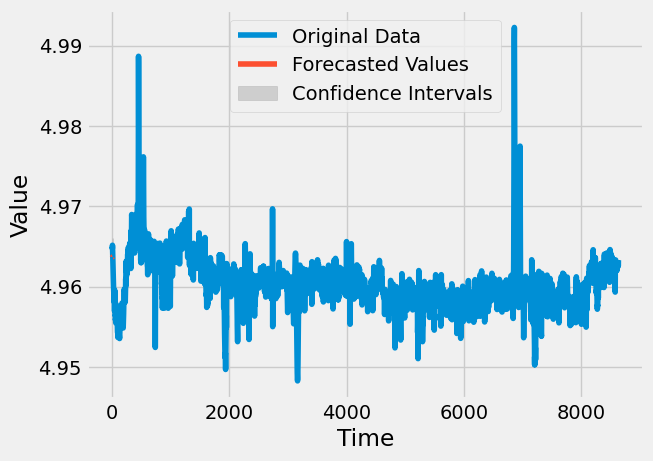

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a list of data
data = [10, 20, 30, 40, 50]  # Replace with your list of data

# Convert the list to a pandas Series with explicit index
series = pd.Series(combined_data, index=pd.RangeIndex(len(combined_data)))

# Fit the ARIMA model
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.get_forecast(steps=3)  # Replace '3' with the number of future steps to forecast

# Extract the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the original data and the forecasted values
plt.plot(series, label='Original Data')
plt.plot(range(len(data), len(data) + len(forecasted_values)), forecasted_values, label='Forecasted Values')
plt.fill_between(range(len(data), len(data) + len(forecasted_values)), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv', parse_dates=['From'])
df.head()

#                 From   To (Interval: 15M)  \
0  1  2023-02-01 00:00:00  2023-02-01 00:15:00   
1  2  2023-02-01 00:15:00  2023-02-01 00:30:00   
2  3  2023-02-01 00:30:00  2023-02-01 00:45:00   
3  4  2023-02-01 00:45:00  2023-02-01 01:00:00   
4  5  2023-02-01 01:00:00  2023-02-01 01:15:00   

   Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
0                                               95.0       
1                                               95.0       
2                                               95.0       
3                                              122.0       
4                                              122.0       

   Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
0                                               35.0        
1                                               35.0        
2                                               35.0        
3                                               34.0        
4                                               34.0        

   Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
0                                               90.1      
1                                               88.0      
2                                               87.7      
3                                               88.9      
4                                               90.0      

   Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
0                                               56.2    
1                                               55.1    
2                                               55.2    
3                                               55.7    
4                                               55.8    

   Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)  \
0                                               0.31     
1                                               0.33     
2                                               0.38     
3                                               0.38     
4                                               0.38     

   Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)  \
0                                               17.7      
1                                               18.3      
2                                               19.7      
3                                               21.3      
4                                               22.3      

   Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)  \
0                                               28.1        
1                                               27.1        
2                                               24.9        
3                                               21.9        
4                                               16.7        

   Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)  
0                                                0.4         
1                                                0.4         
2                                                0.4         
3                                                0.4         
4                                                0.4

In [ ]:
df.shape

(8643, 13)

In [ ]:
column_names=df.columns
print(column_names)

Index(['#', 'From', 'To (Interval: 15M)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)'],
      dtype='object')


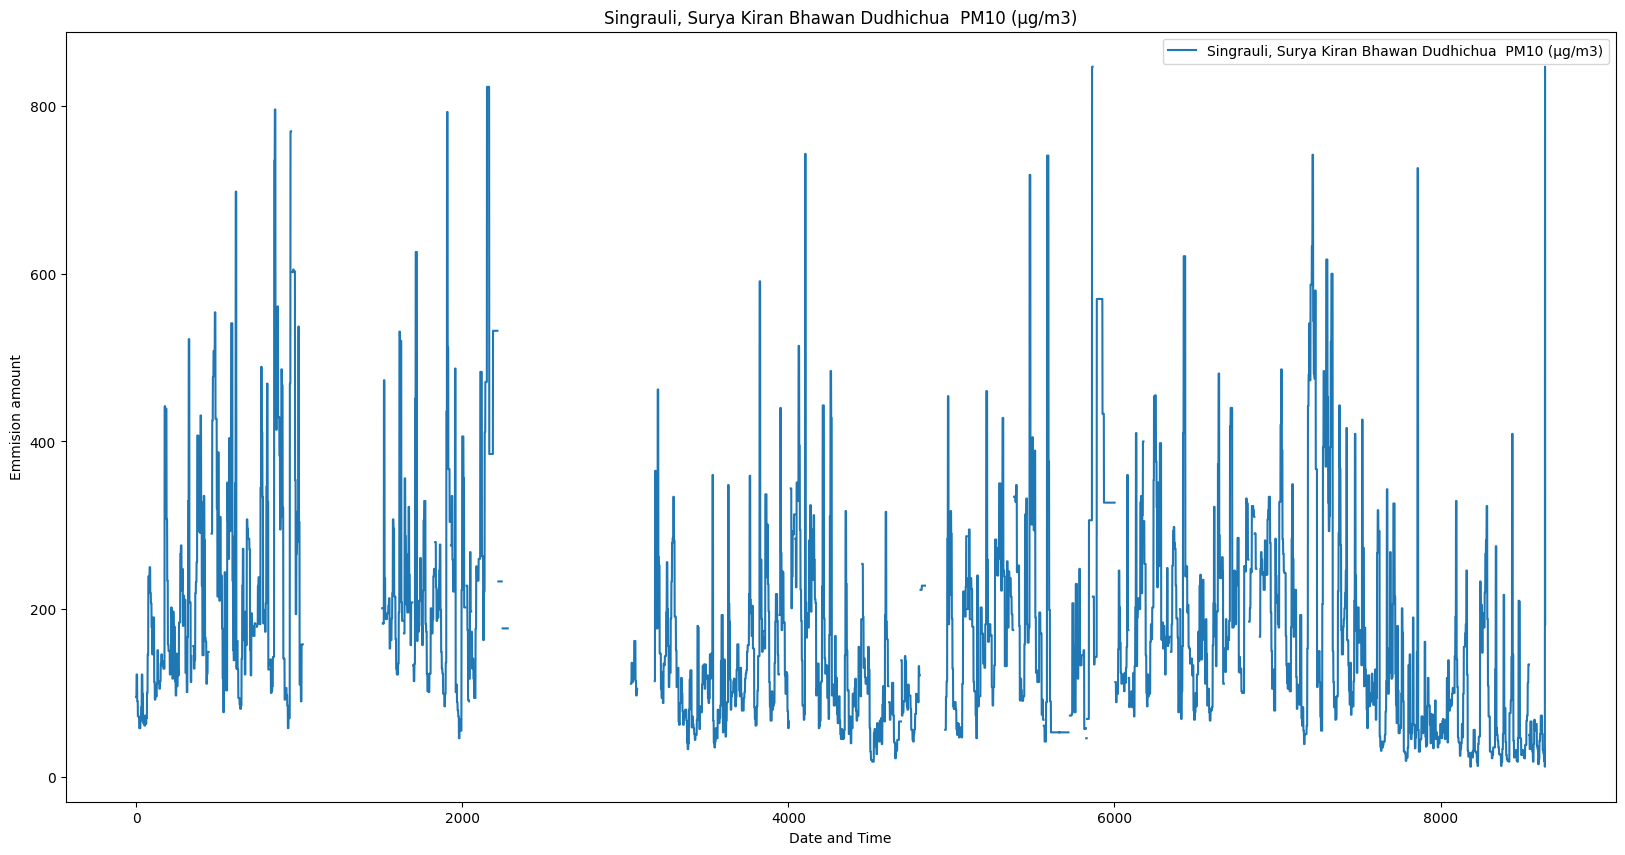

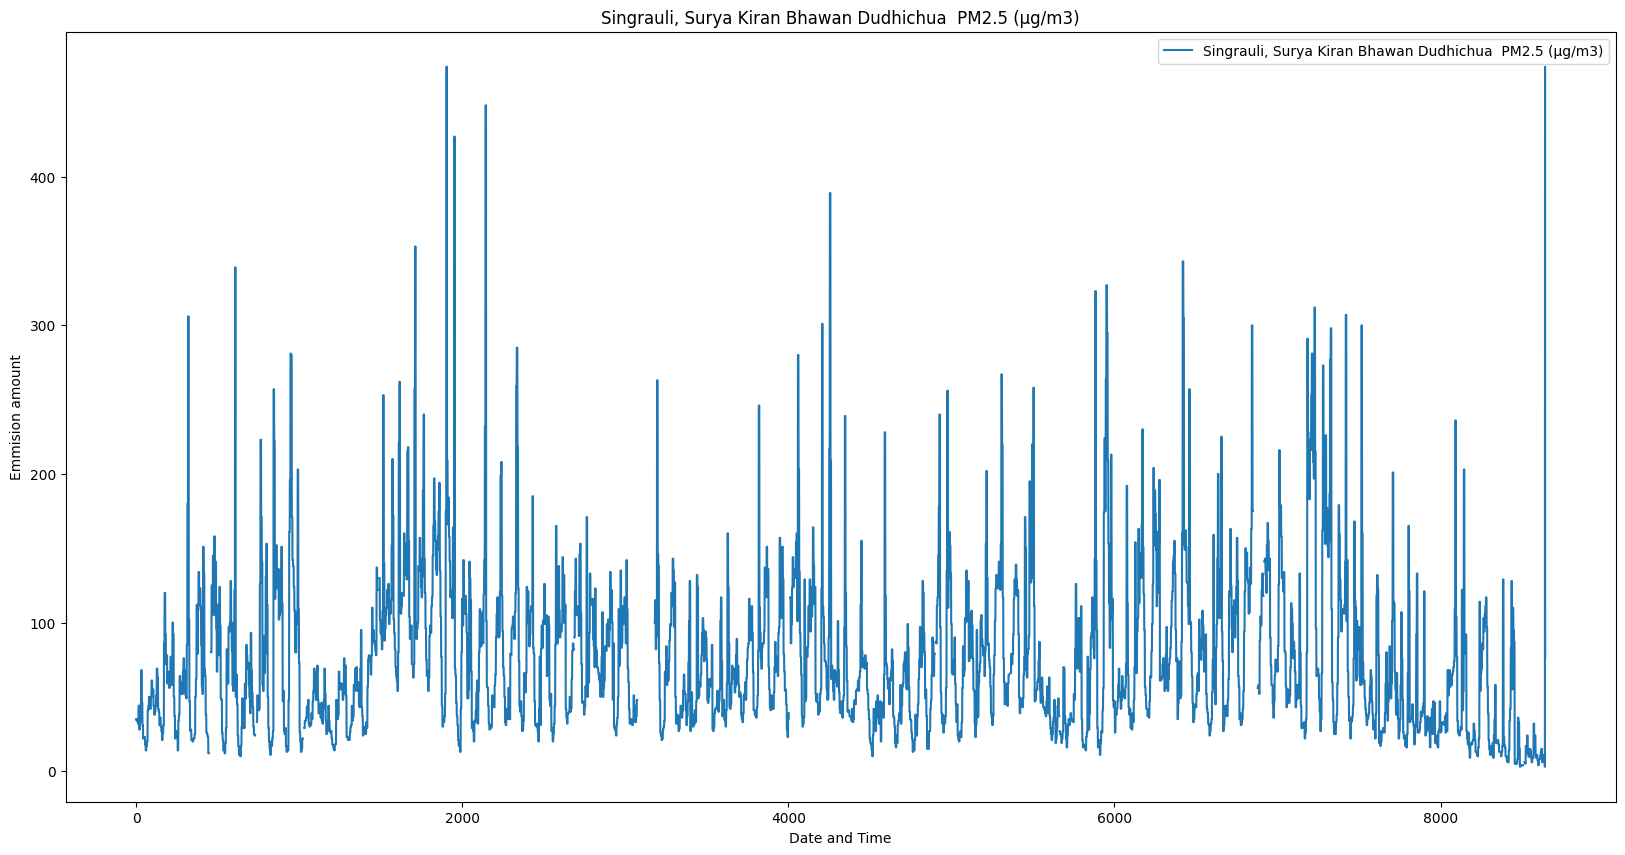

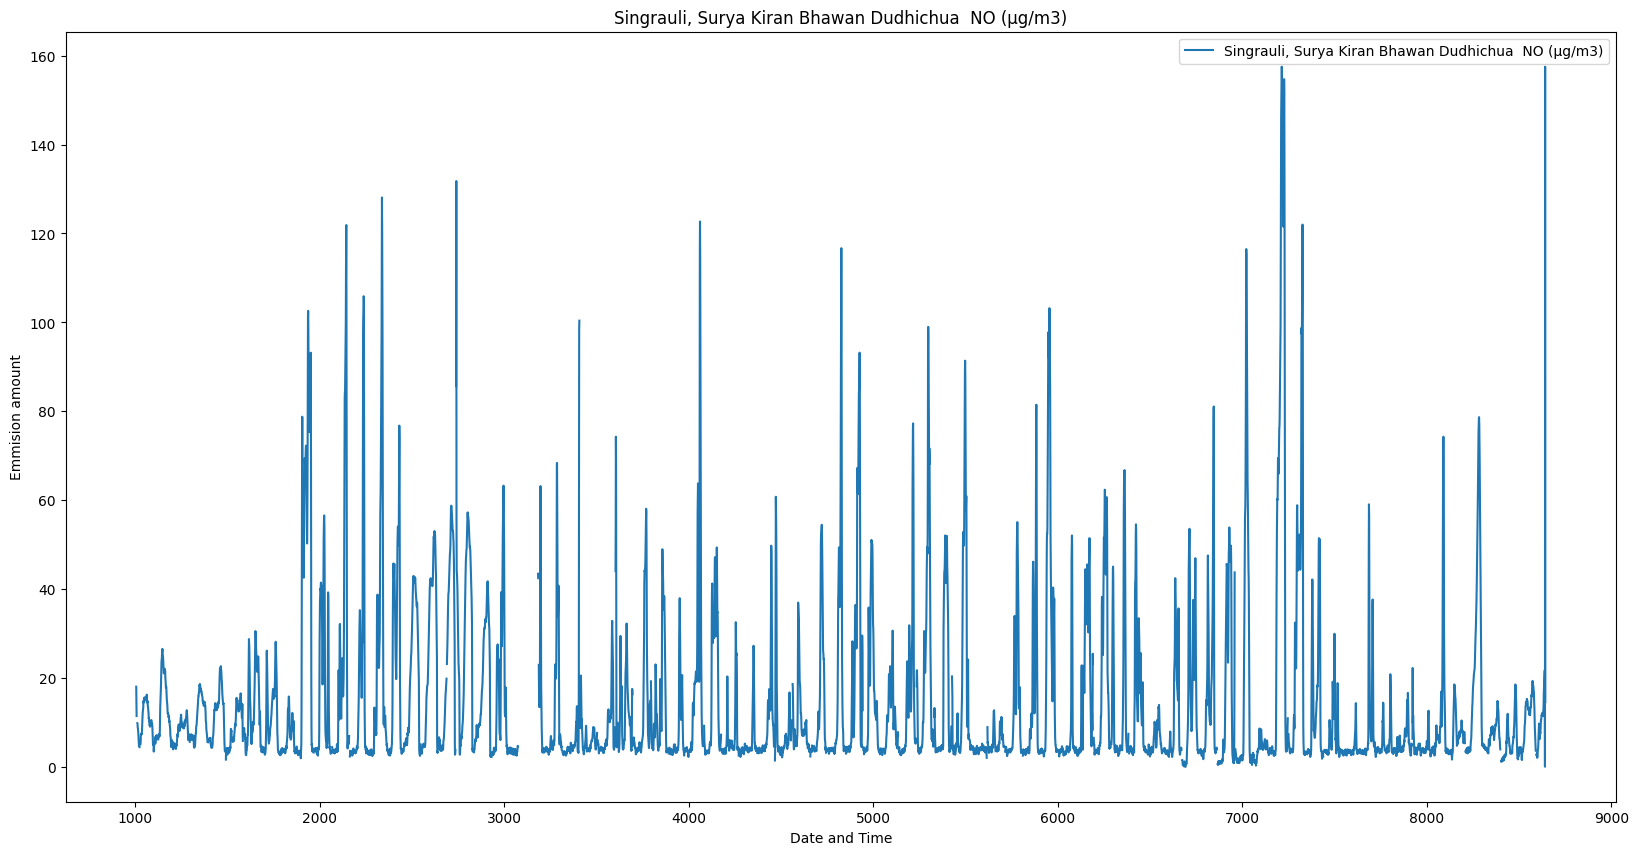

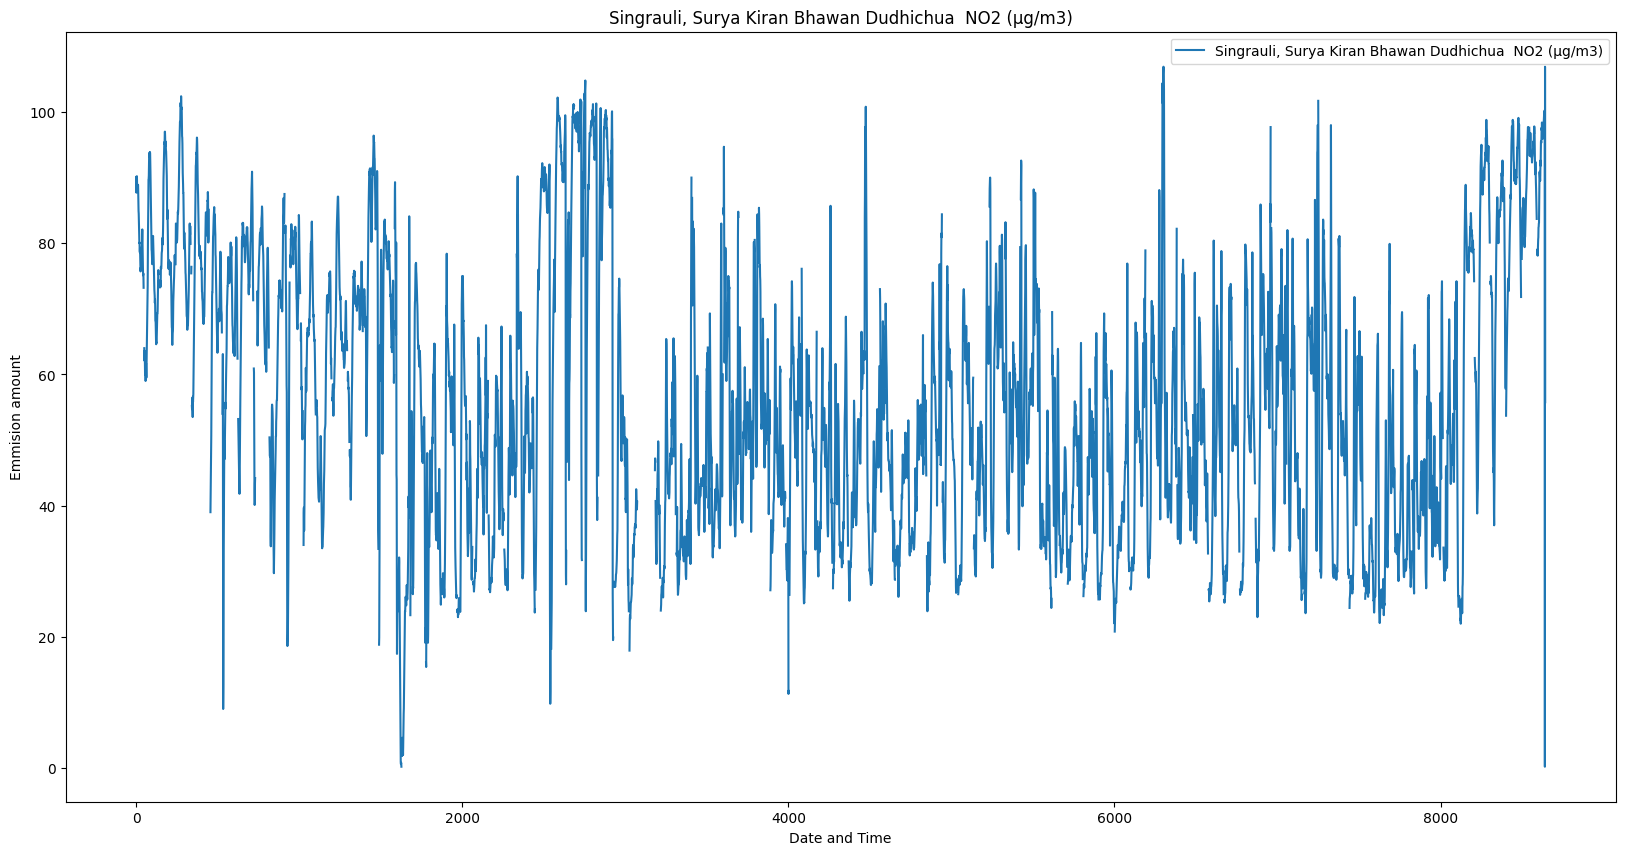

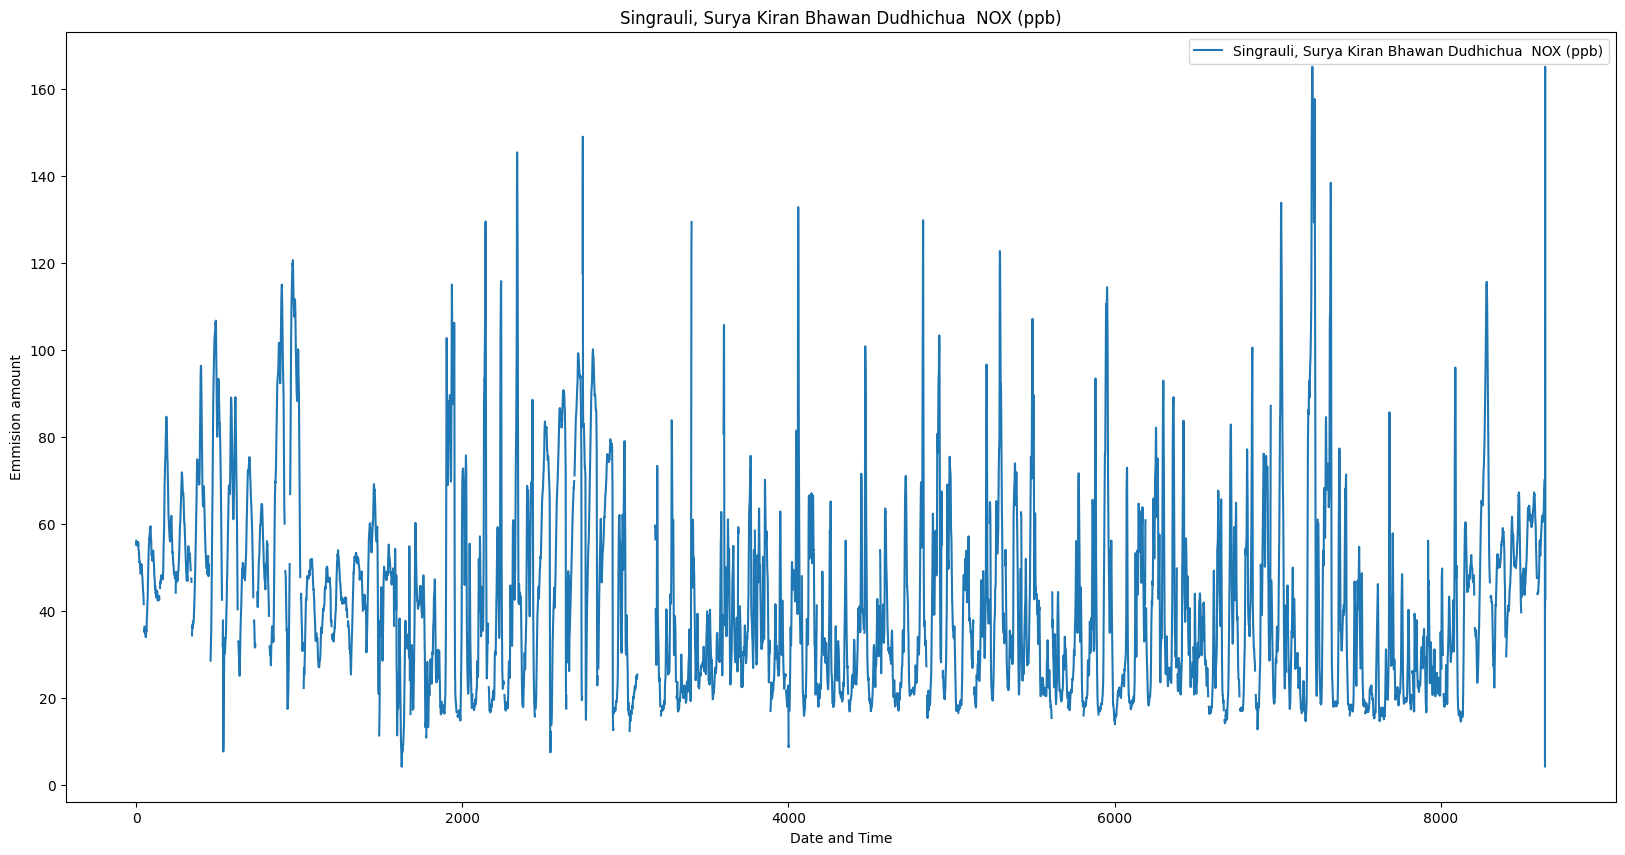

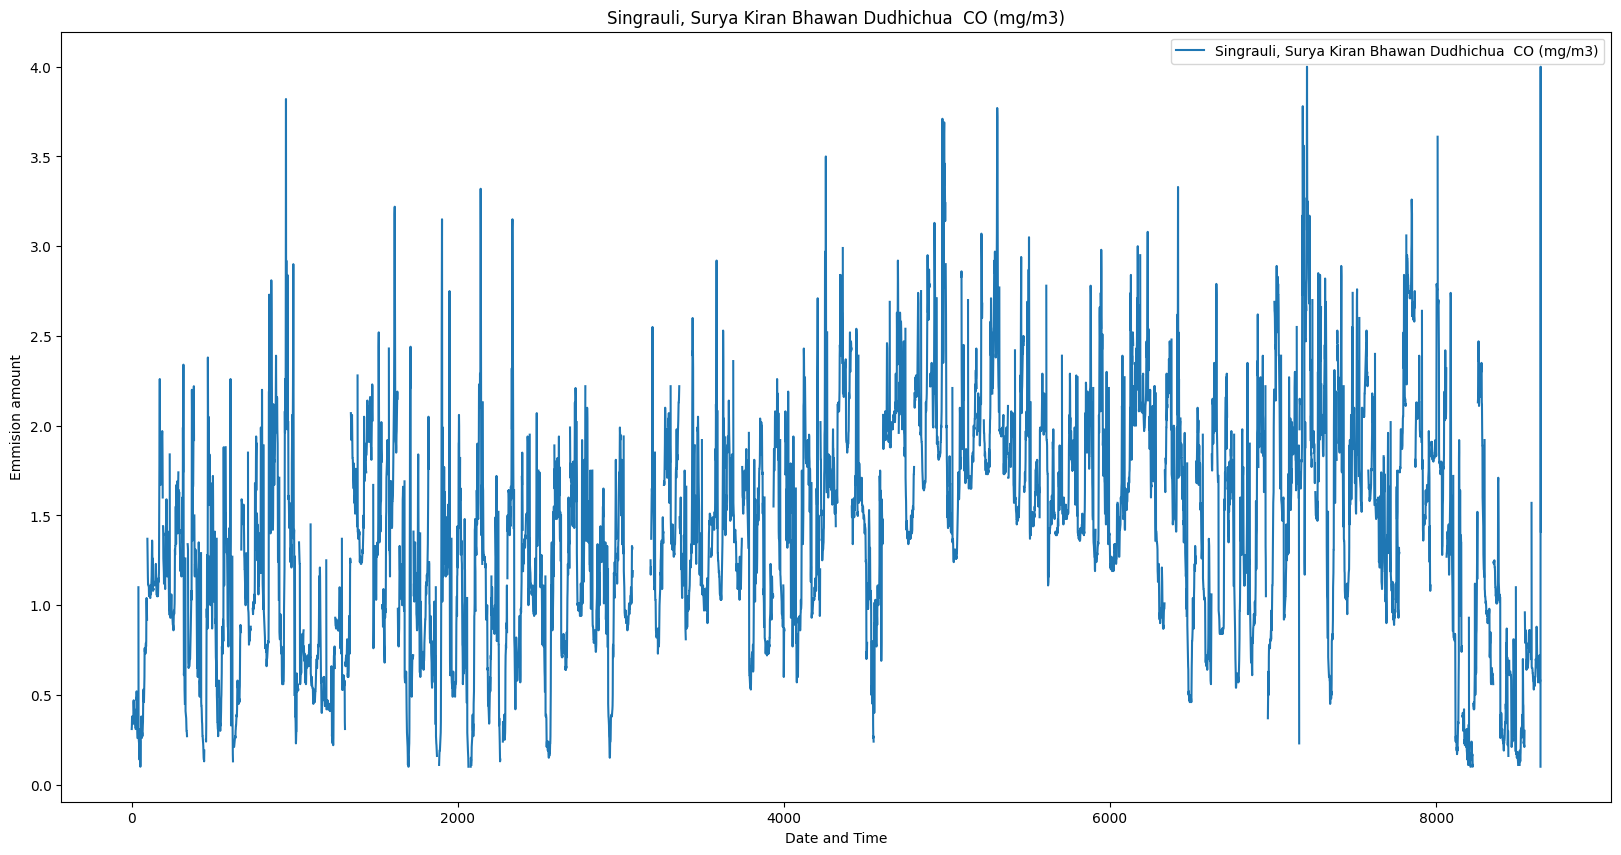

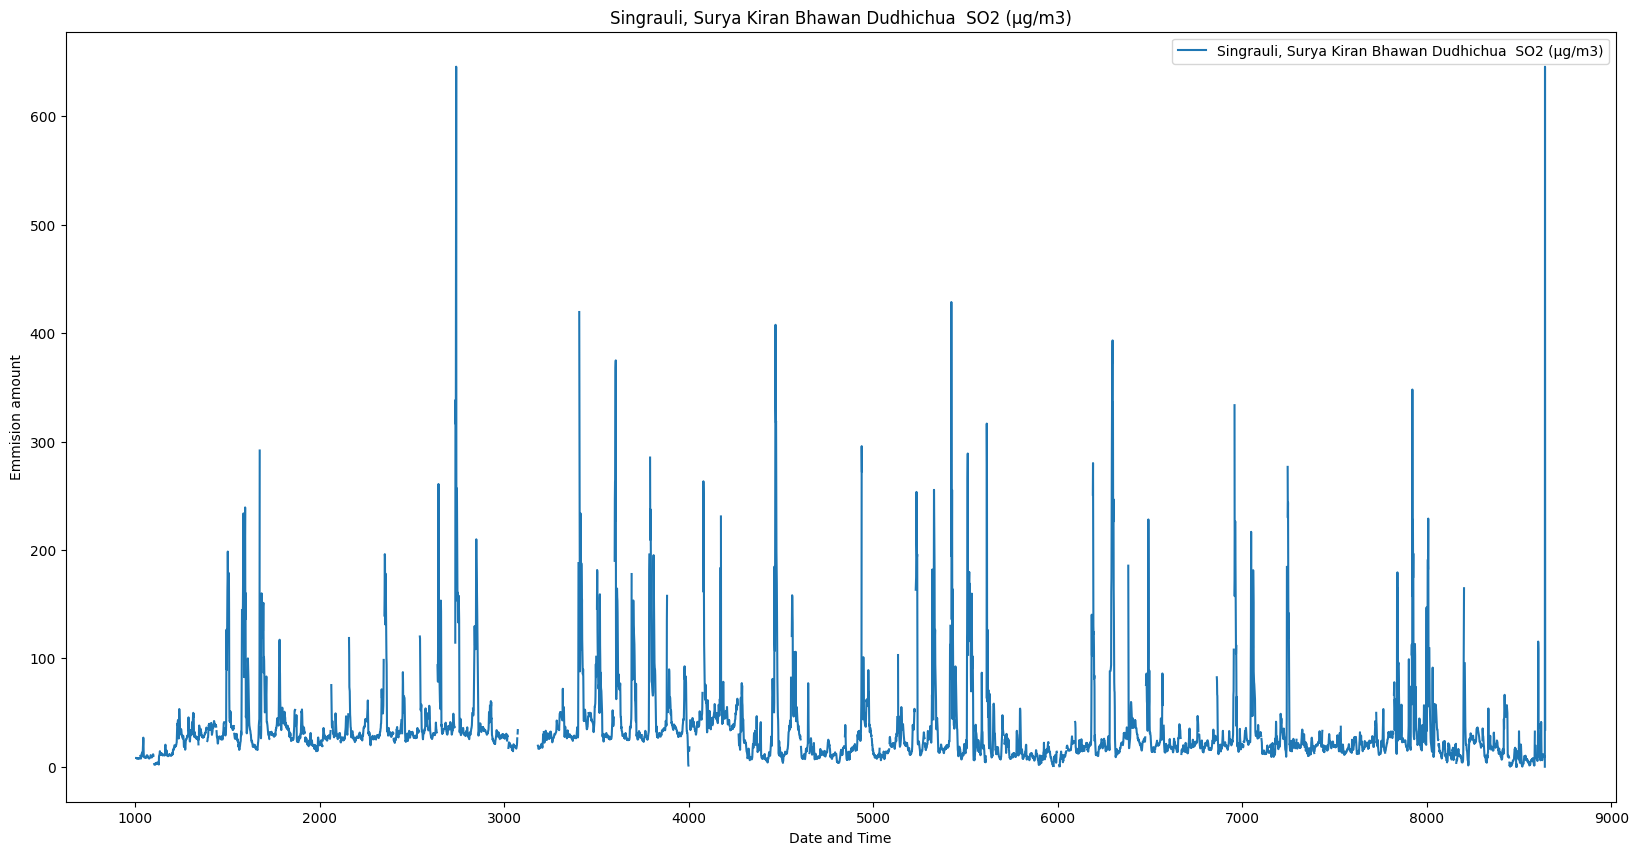

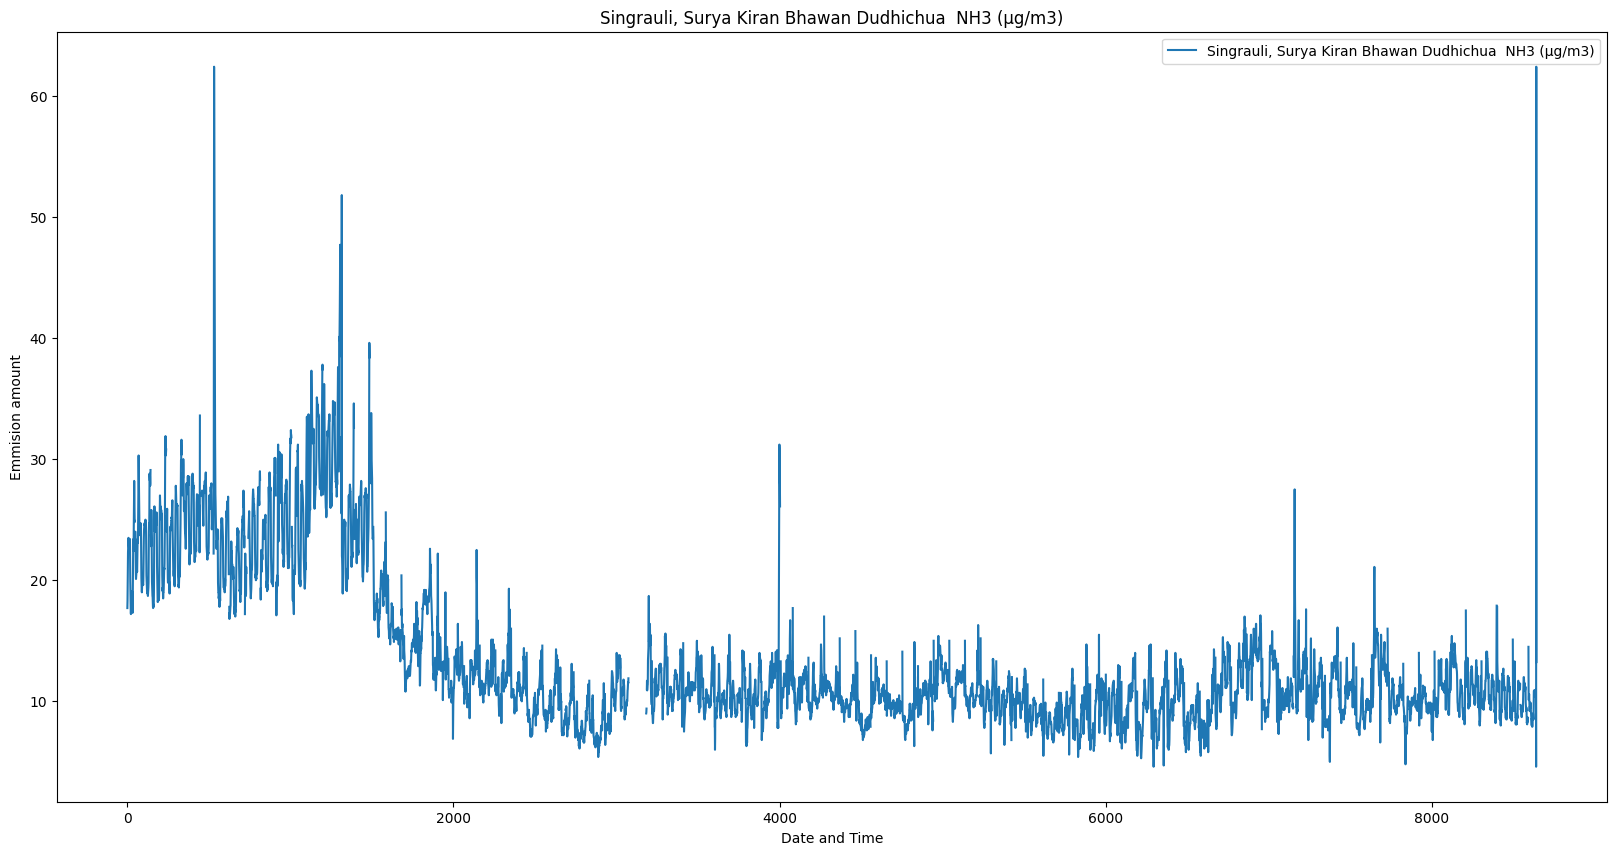

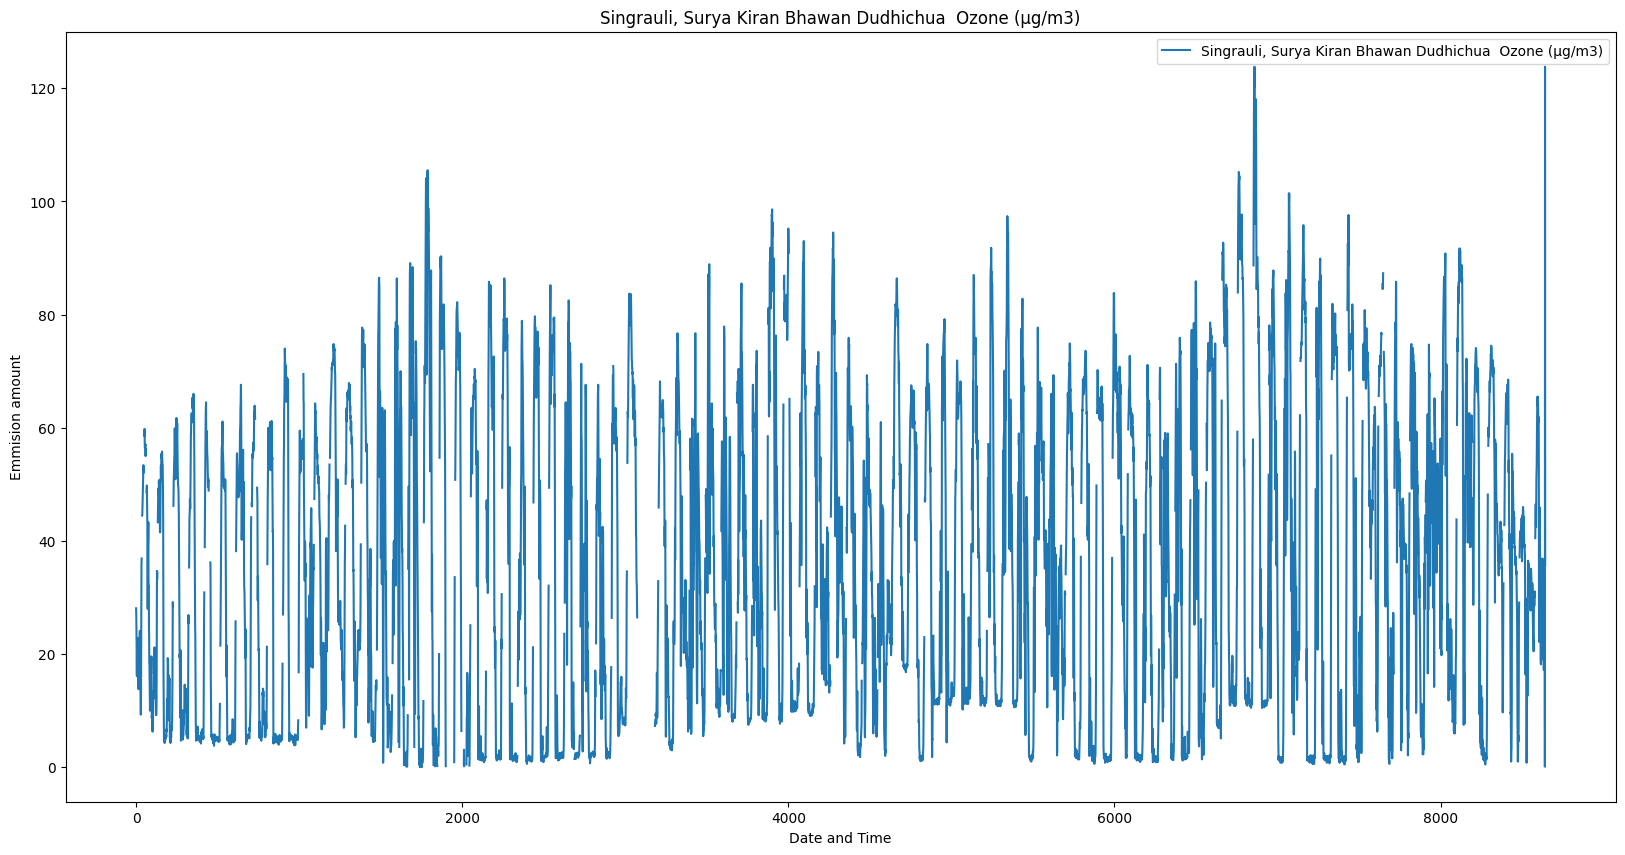

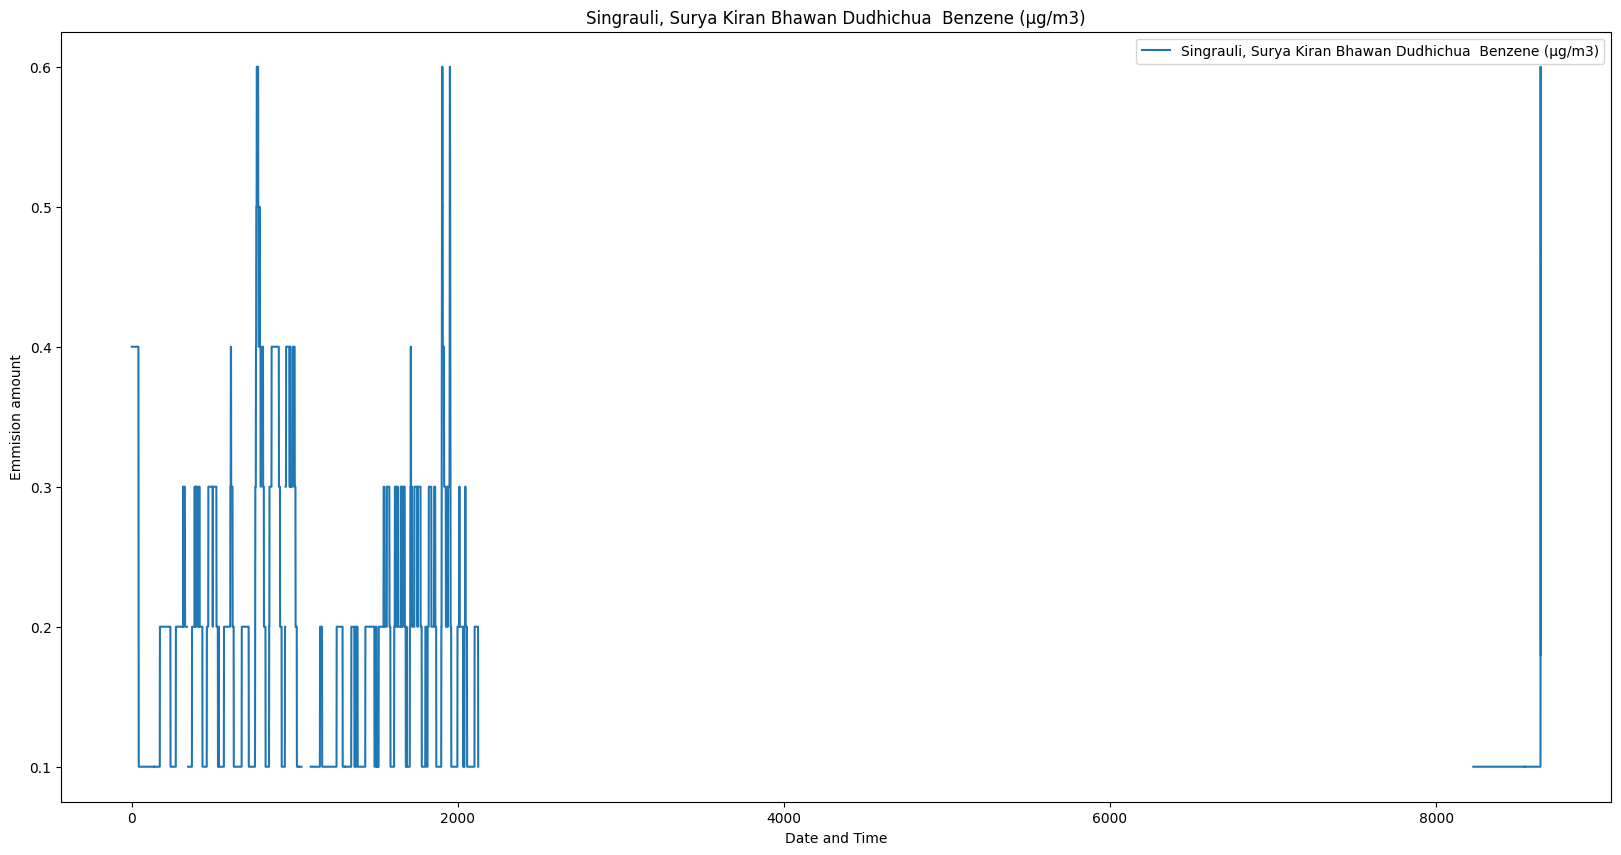

In [ ]:
for column in column_names[3:]:
    plt.figure(figsize=(20,10))
    df[column].plot()
    plt.xlabel('Date and Time')
    plt.ylabel('Emmision amount')
    plt.title(column)
    plt.legend()
    plt.show()

In [ ]:
for column in column_names[3:]:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(column_):
    result=adfuller(column_)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

for column in column_names[3:]:
    adfuller_test(df[column])

ADF Test Statistic : -9.271489340273863
p-value : 1.323126731075347e-15
#Lags Used : 36
Number of Observations : 8606
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -11.515043607228582
p-value : 4.169885381468076e-21
#Lags Used : 36
Number of Observations : 8606
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -16.288040958846473
p-value : 3.360060079155563e-29
#Lags Used : 5
Number of Observations : 8637
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -11.157092775788731
p-value : 2.84800937065354e-20
#Lags Used : 12
Number of Observations : 8630
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
ADF Test Statistic : -13.786838330781556
p-value : 9.078928428822969e-26
#Lags Used : 6
Number of Observations : 8636
strong evidence against t

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


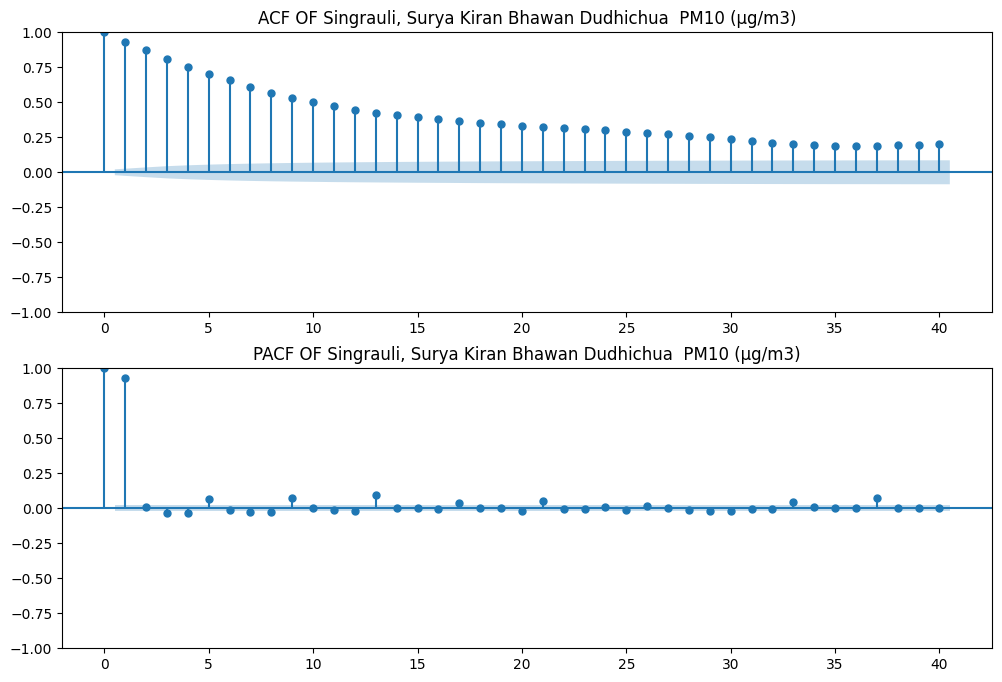

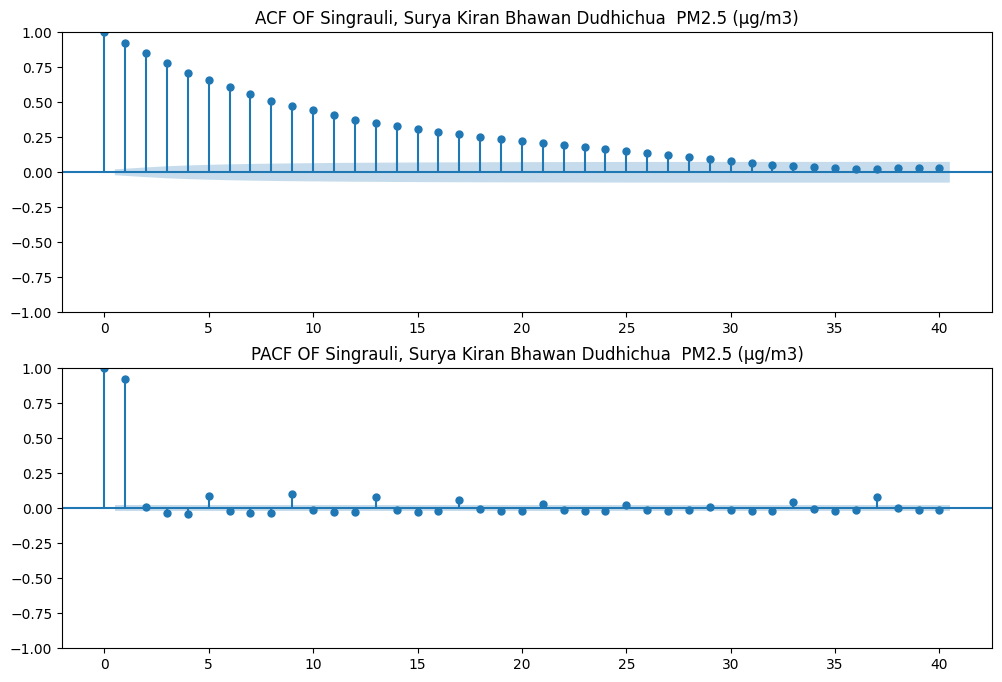

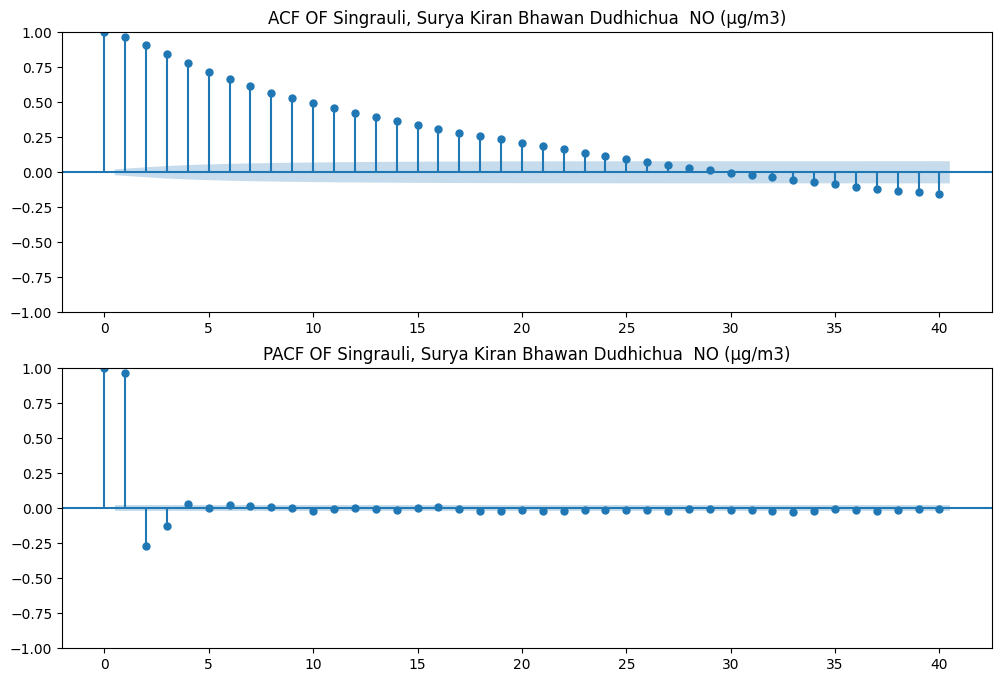

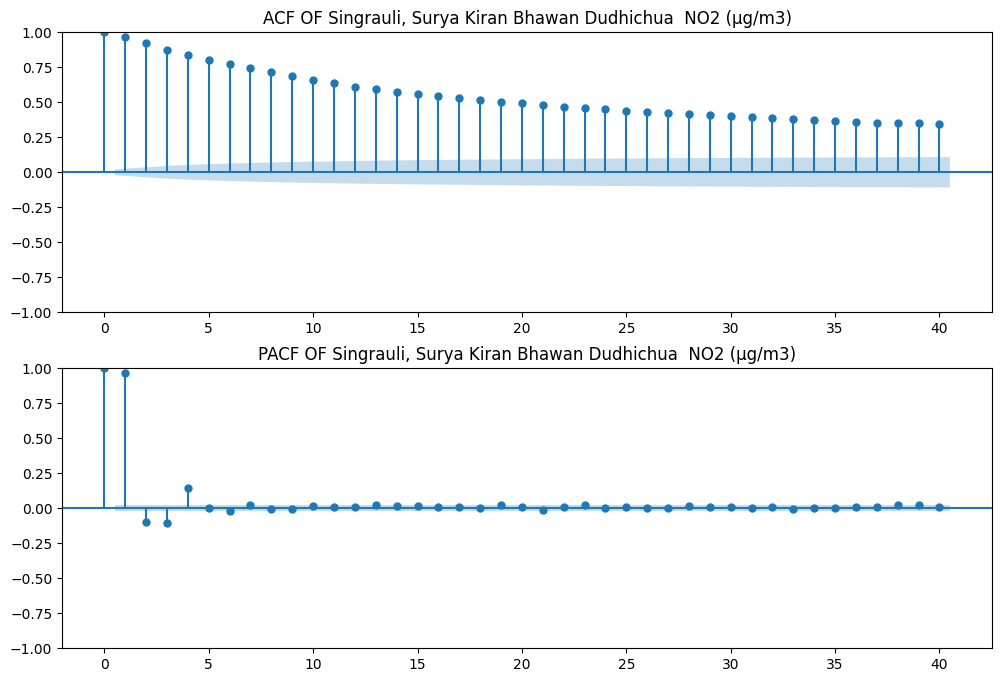

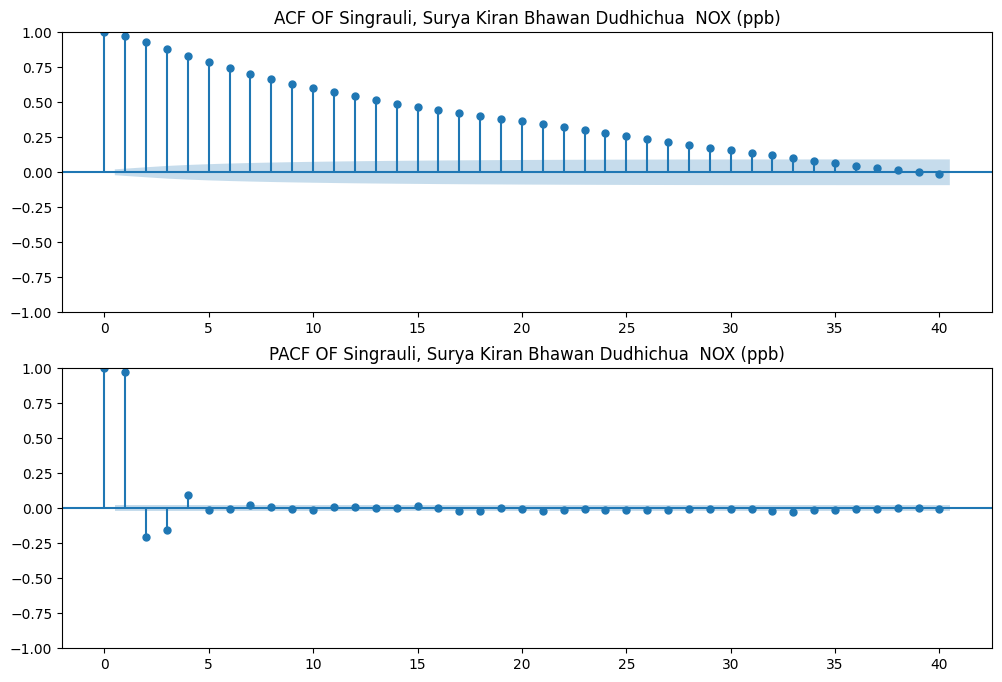

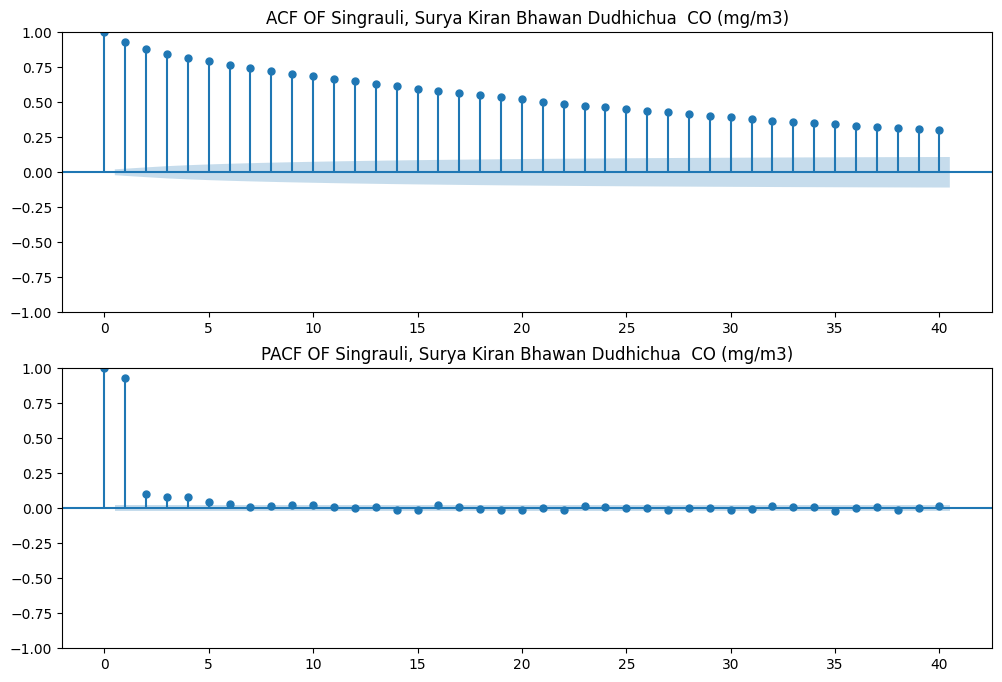

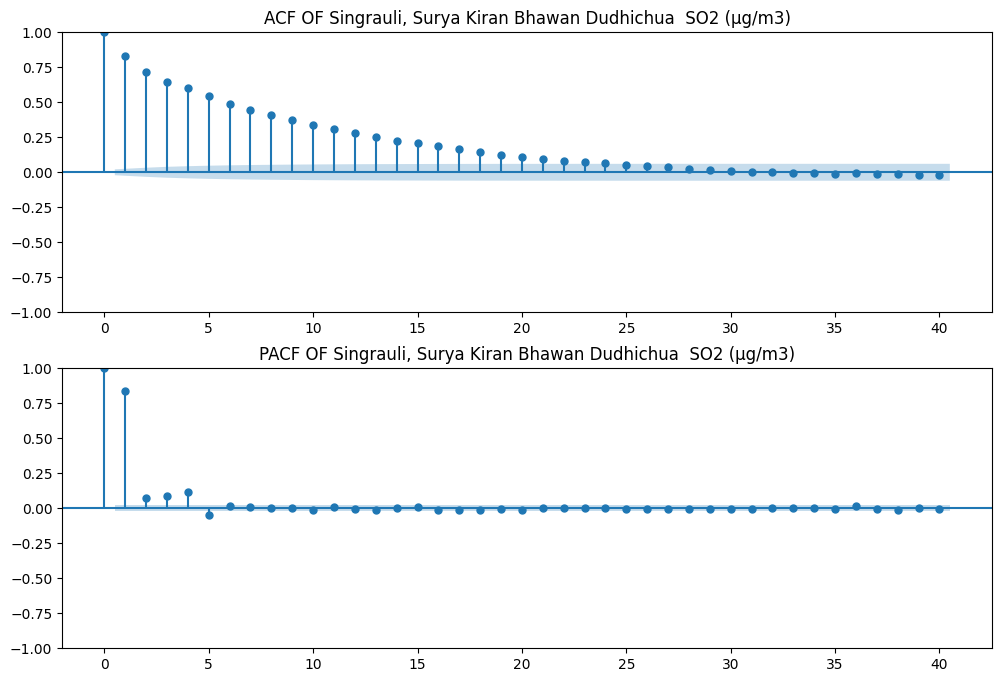

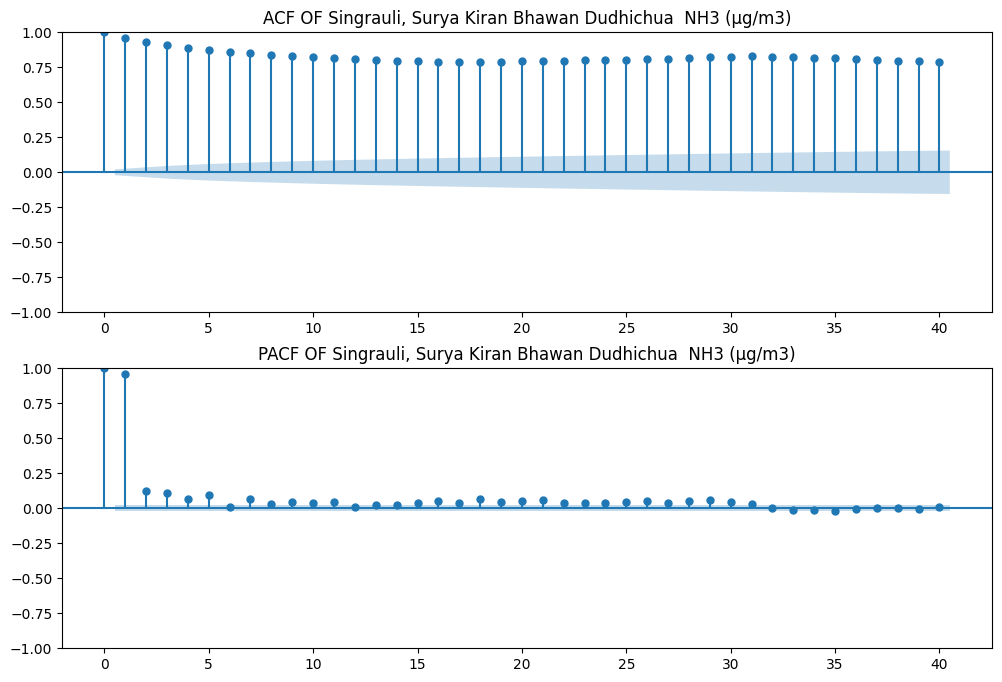

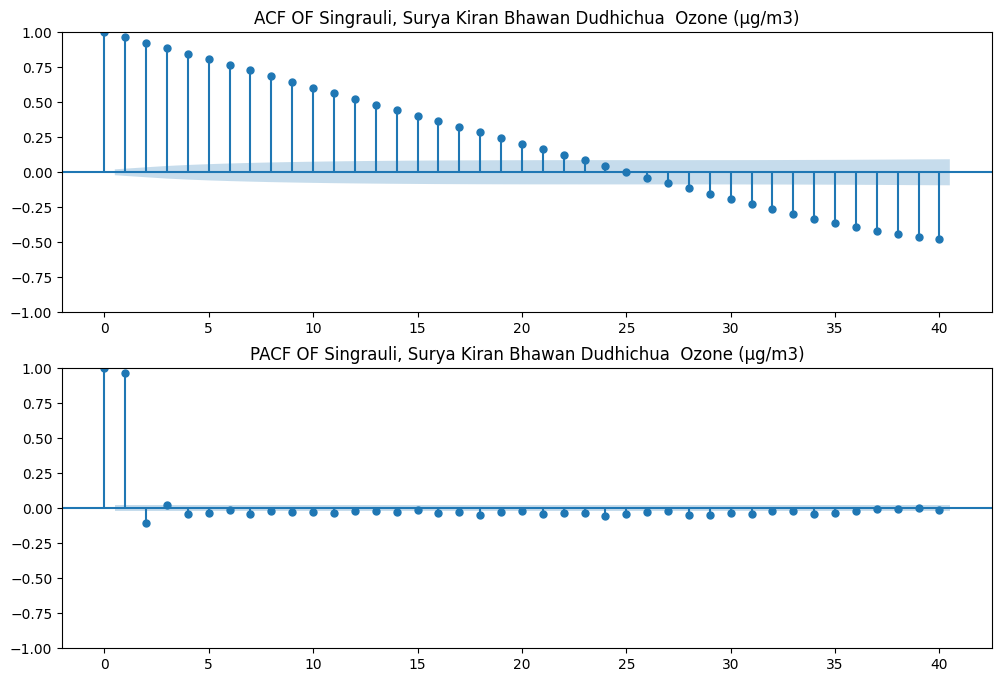

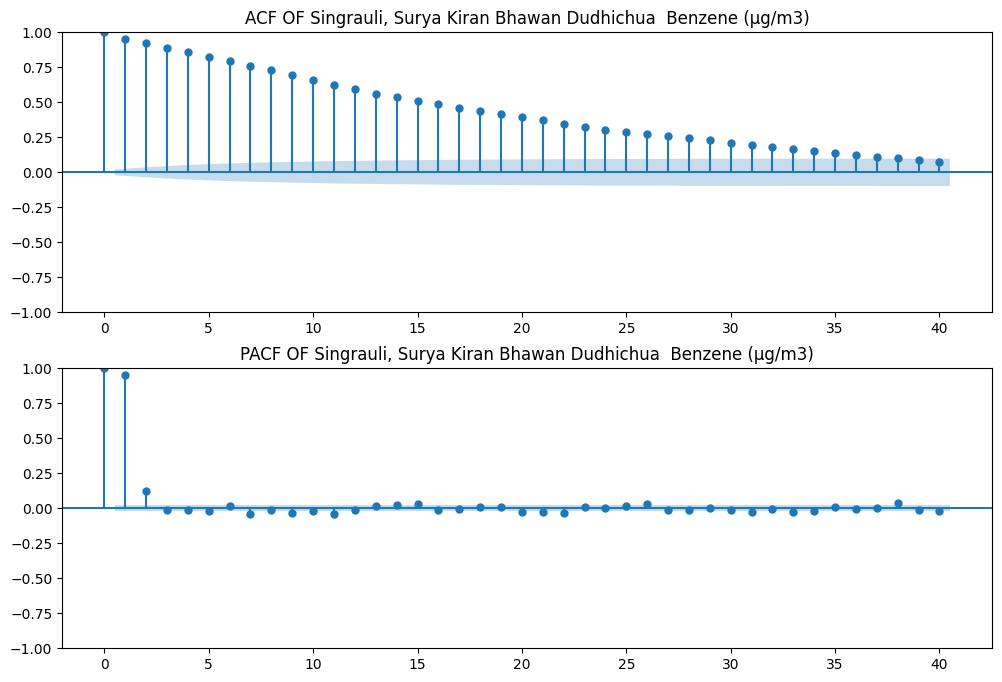

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
i=0
for column in column_names[3:]:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[column].dropna(),lags=40,ax=ax1)
    ax1.set_title('ACF OF '+column)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[column].dropna(),lags=40,ax=ax2)
    ax2.set_title('PACF OF '+column)
    i+=1

In [ ]:
lags=[1,1,3,4,4,4,4,5,2,2]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import math

                                              AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8636
Model:                                                        AutoReg(1)   Log Likelihood              -44620.621
Method:                                                  Conditional MLE   S.D. of innovations             42.456
Date:                                                   Wed, 28 Jun 2023   AIC                          89247.242
Time:                                                           03:16:47   BIC                          89268.432
Sample:                                                                1   HQIC                         89254.467
                                                                    8636                                         
                                                               coef    std err          

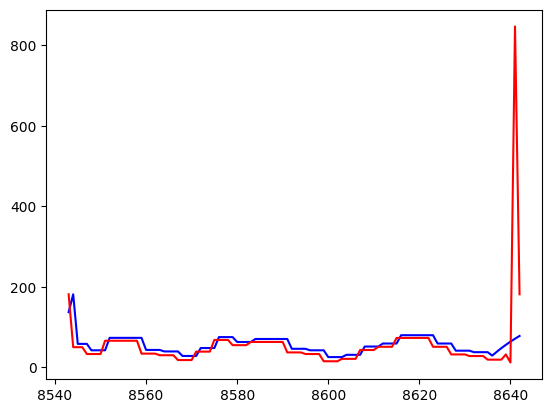

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


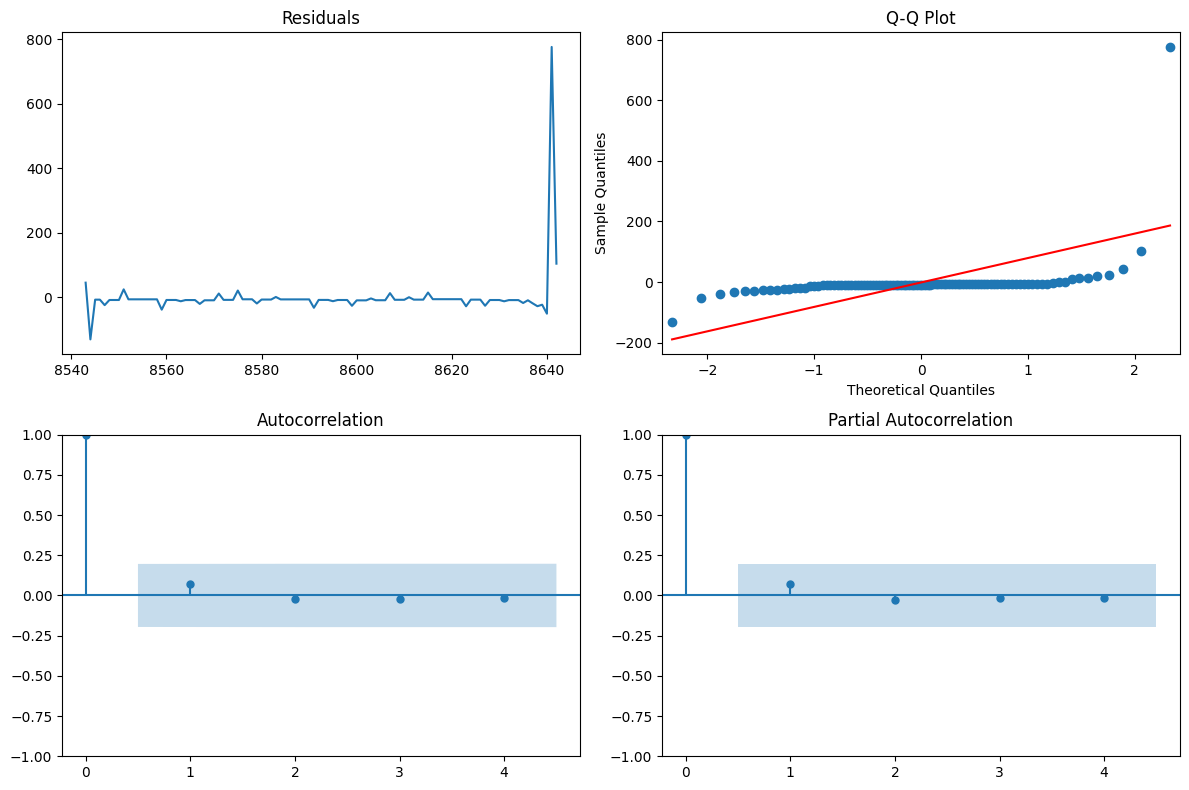

Mean : 181.479950
Root Mean Squared Error : 80.654498
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8636
Model:                                                         AutoReg(1)   Log Likelihood              -38203.483
Method:                                                   Conditional MLE   S.D. of innovations             20.193
Date:                                                    Wed, 28 Jun 2023   AIC                          76412.967
Time:                                                            03:16:48   BIC                          76434.157
Sample:                                                                 1   HQIC                         76420.192
                                                                     8636                                         
                          

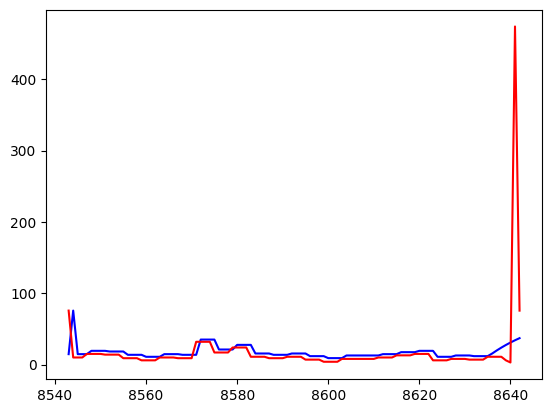

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


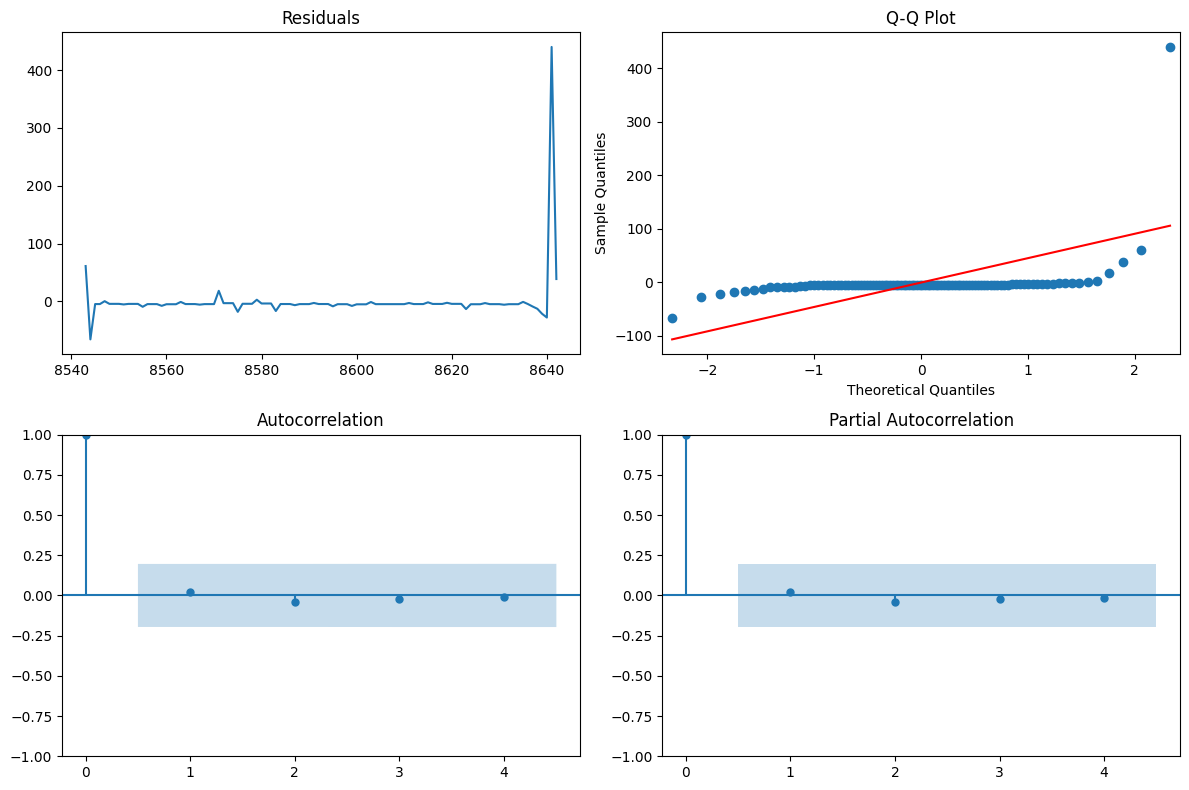

Mean : 75.729083
Root Mean Squared Error : 45.559700
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)   No. Observations:                 8636
Model:                                                      AutoReg(3)   Log Likelihood              -23192.235
Method:                                                Conditional MLE   S.D. of innovations              3.552
Date:                                                 Wed, 28 Jun 2023   AIC                          46394.470
Time:                                                         03:16:49   BIC                          46429.787
Sample:                                                              3   HQIC                         46406.512
                                                                  8636                                         
                                                   

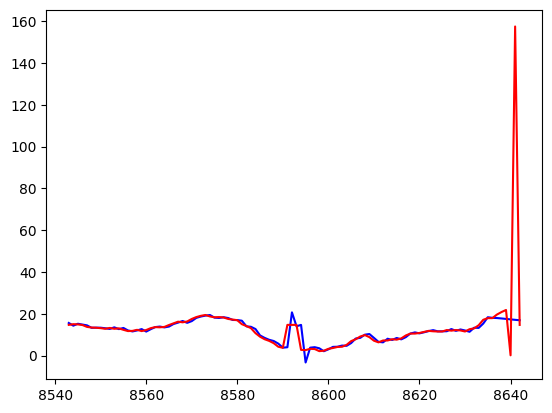

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


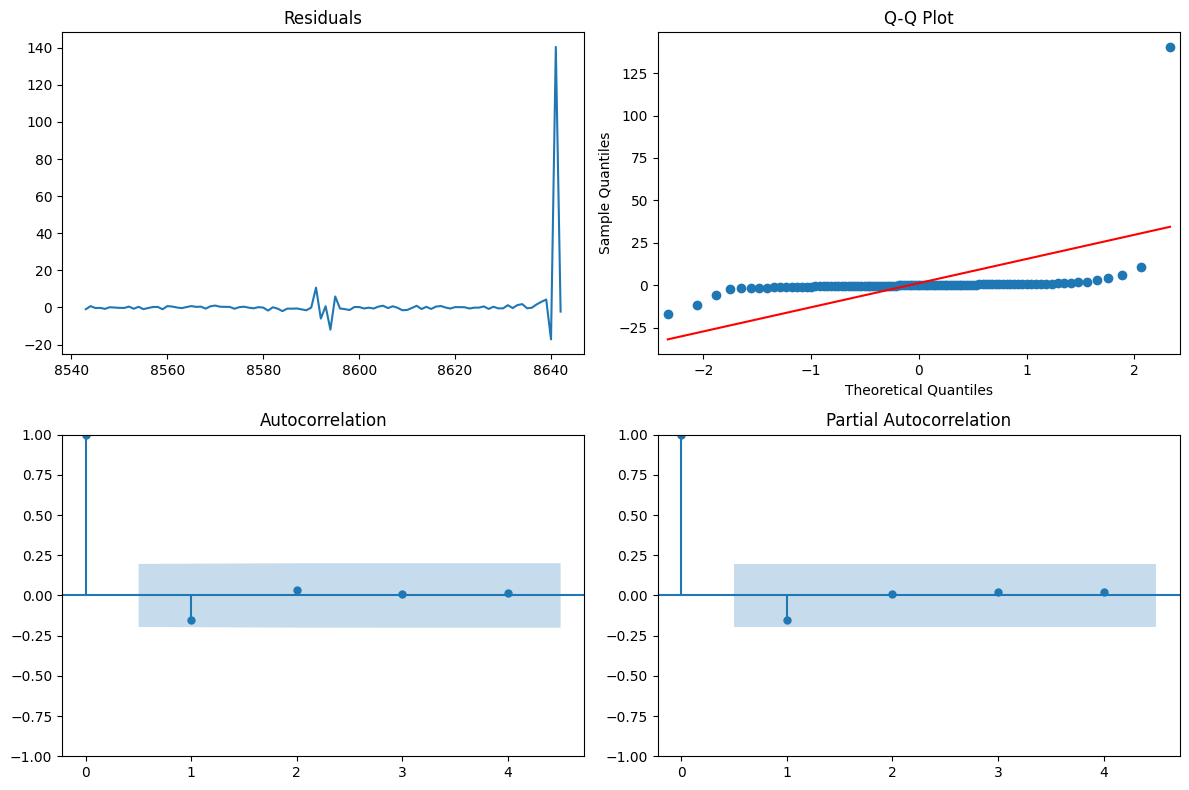

Mean : 14.667274
Root Mean Squared Error : 14.289961
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)   No. Observations:                 8636
Model:                                                       AutoReg(4)   Log Likelihood              -25765.952
Method:                                                 Conditional MLE   S.D. of innovations              4.787
Date:                                                  Wed, 28 Jun 2023   AIC                          51543.904
Time:                                                          03:16:51   BIC                          51586.284
Sample:                                                               4   HQIC                         51558.355
                                                                   8636                                         
                                           

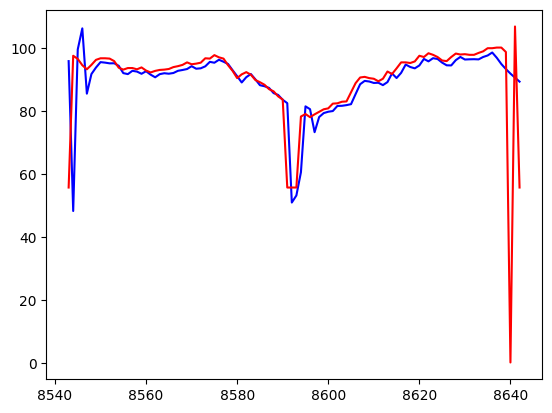

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


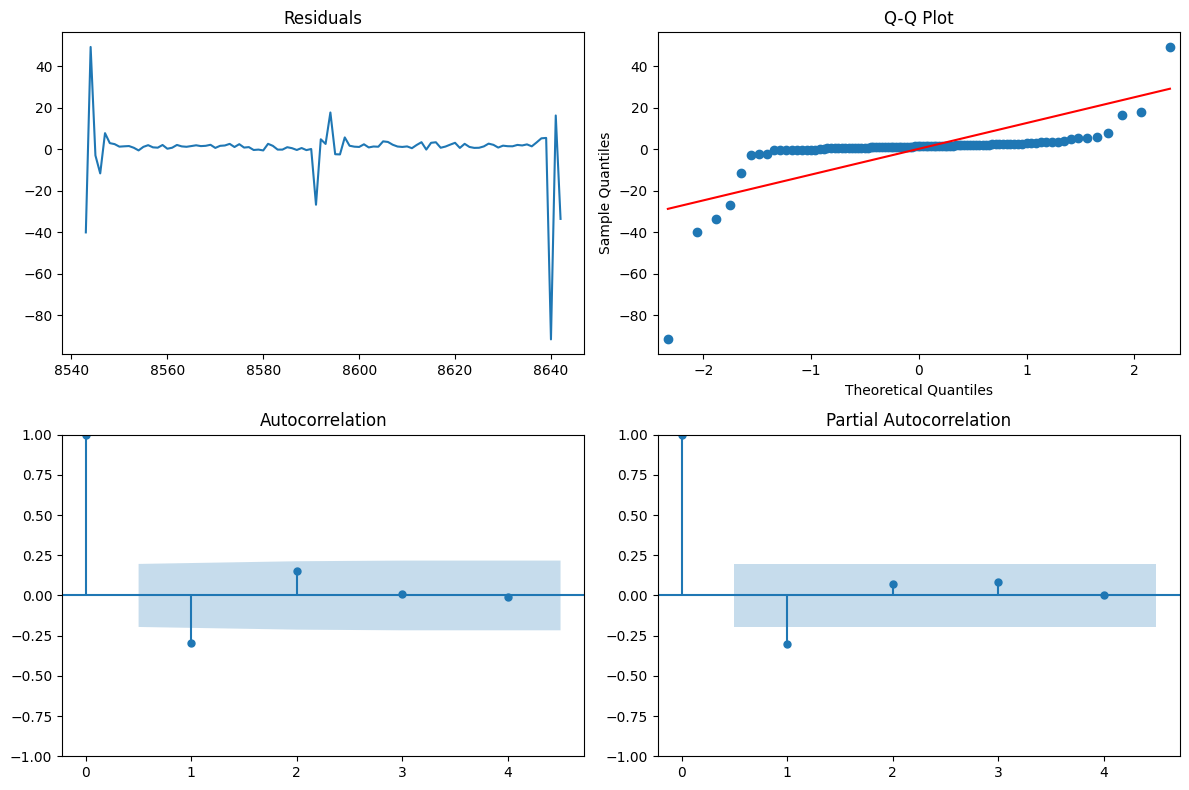

Mean : 55.756492
Root Mean Squared Error : 12.434622
                                            AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)   No. Observations:                 8636
Model:                                                     AutoReg(4)   Log Likelihood              -24976.609
Method:                                               Conditional MLE   S.D. of innovations              4.369
Date:                                                Wed, 28 Jun 2023   AIC                          49965.218
Time:                                                        03:16:52   BIC                          50007.597
Sample:                                                             4   HQIC                         49979.669
                                                                 8636                                         
                                                           

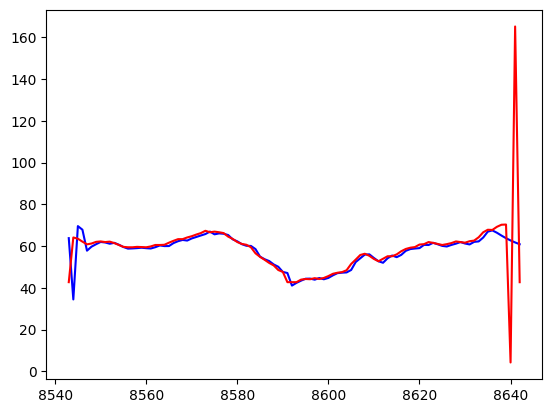

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


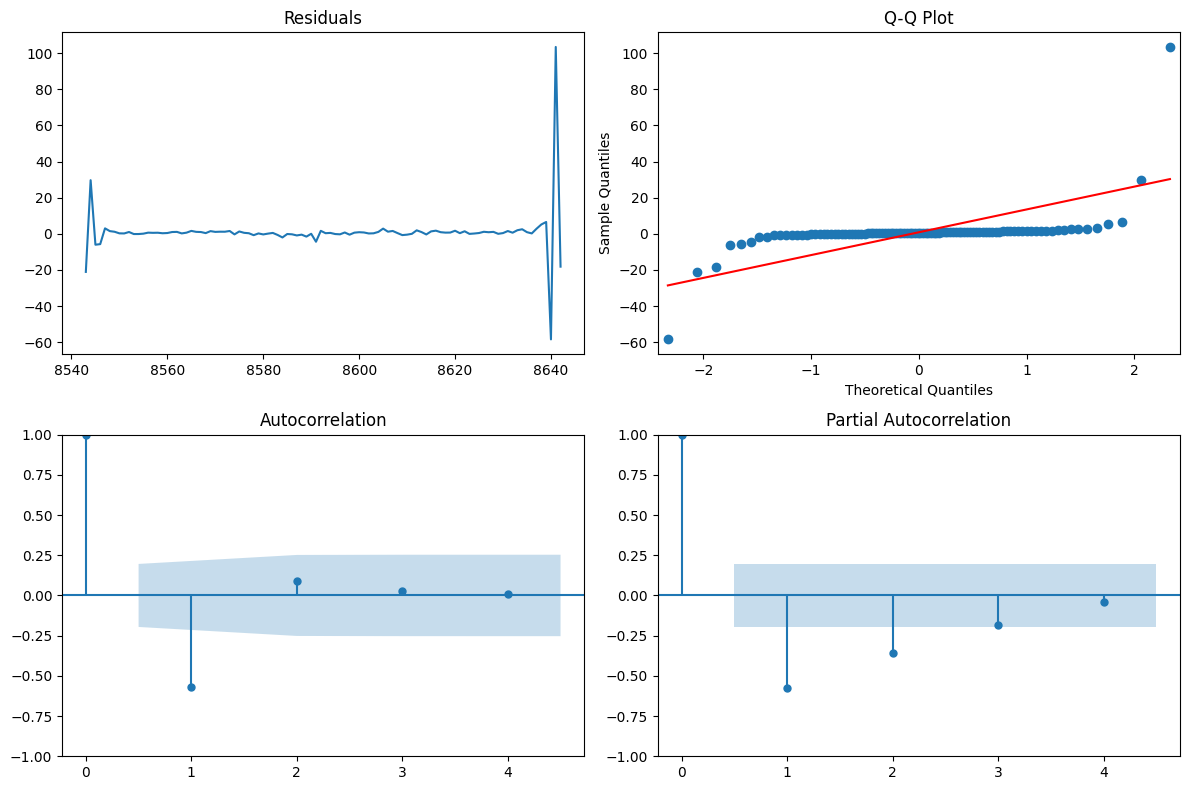

Mean : 42.682434
Root Mean Squared Error : 12.667354
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)   No. Observations:                 8636
Model:                                                      AutoReg(4)   Log Likelihood                1130.817
Method:                                                Conditional MLE   S.D. of innovations              0.212
Date:                                                 Wed, 28 Jun 2023   AIC                          -2249.634
Time:                                                         03:16:53   BIC                          -2207.254
Sample:                                                              4   HQIC                         -2235.183
                                                                  8636                                         
                                                   

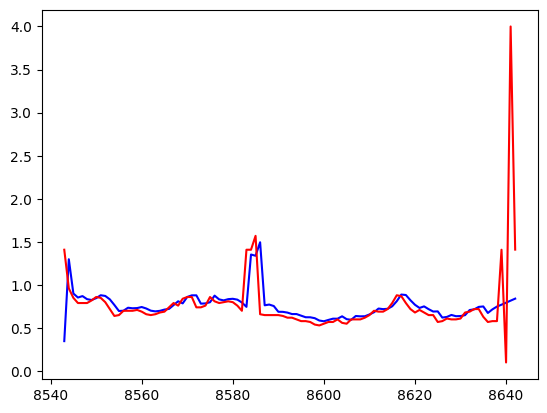

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


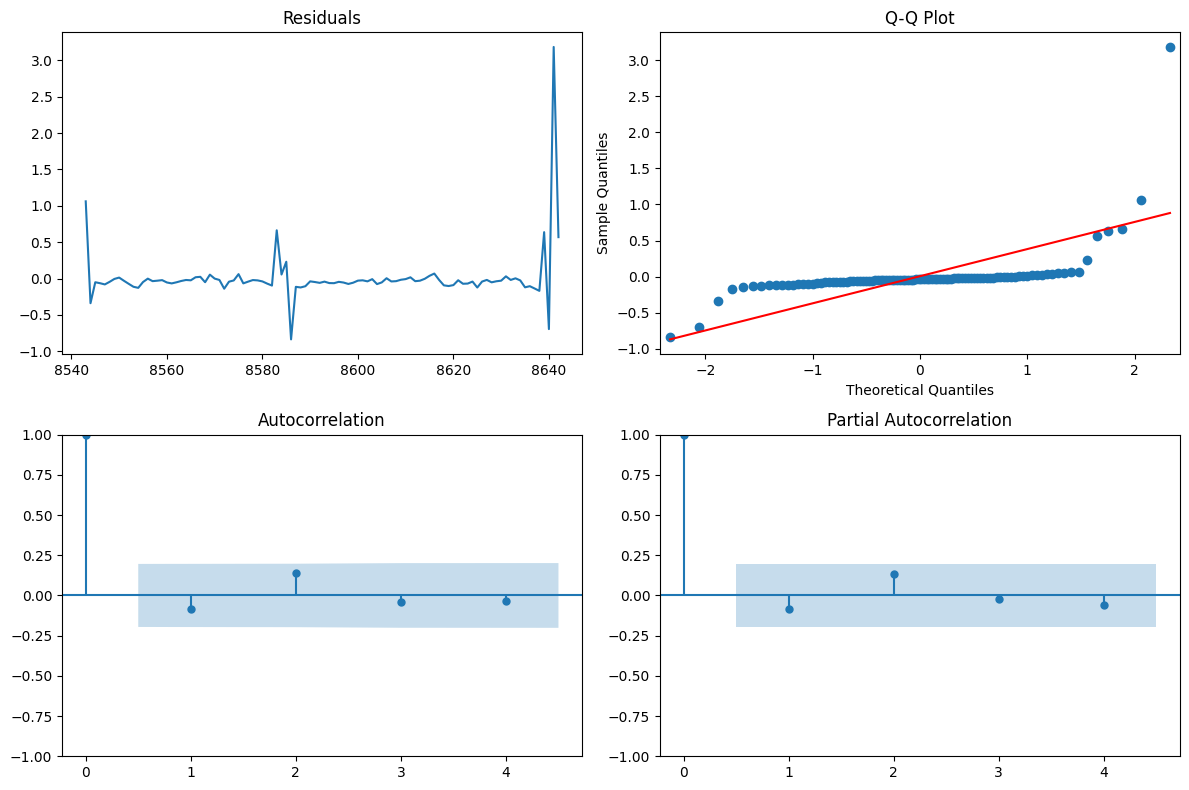

Mean : 1.408695
Root Mean Squared Error : 0.375827
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)   No. Observations:                 8636
Model:                                                       AutoReg(4)   Log Likelihood              -37149.030
Method:                                                 Conditional MLE   S.D. of innovations             17.898
Date:                                                  Wed, 28 Jun 2023   AIC                          74310.061
Time:                                                          03:16:54   BIC                          74352.440
Sample:                                                               4   HQIC                         74324.511
                                                                   8636                                         
                                             

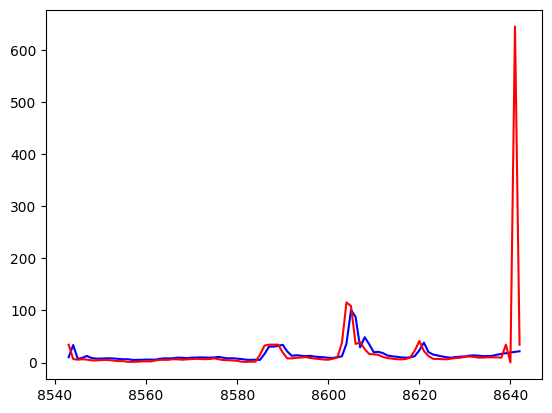

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


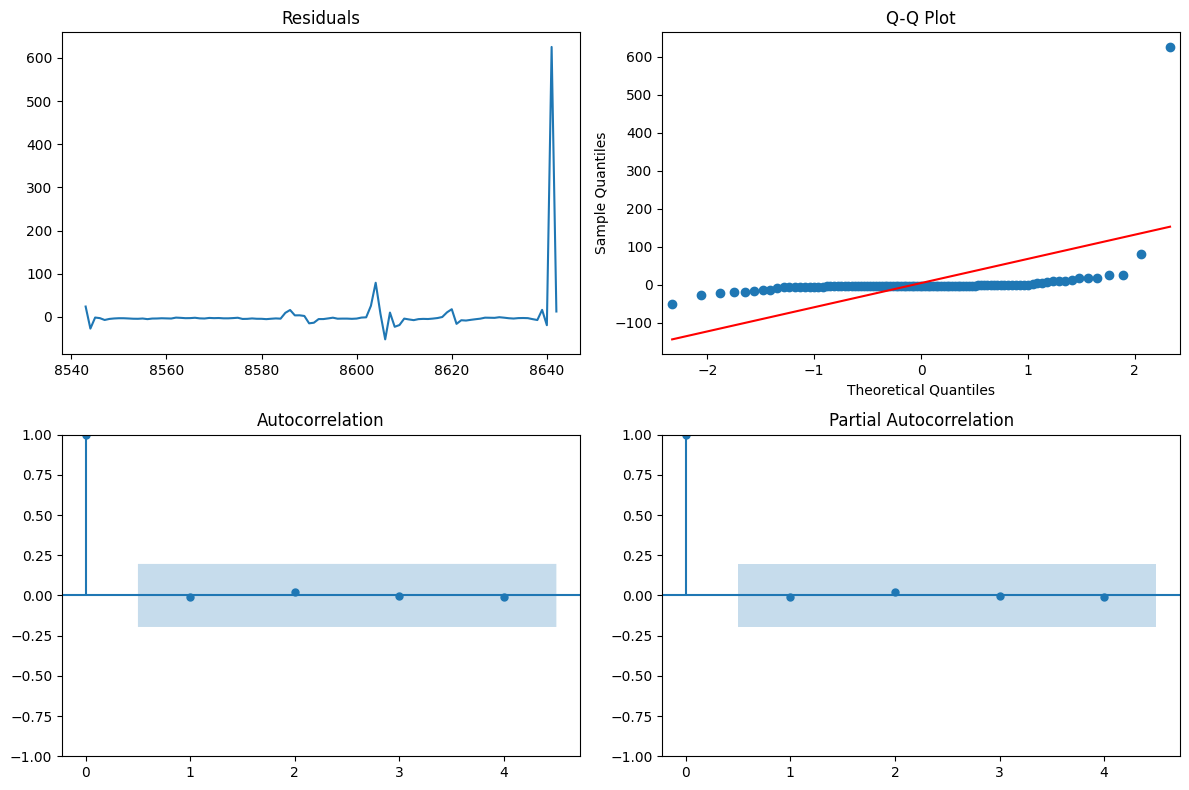

Mean : 34.312991
Root Mean Squared Error : 63.738168
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)   No. Observations:                 8636
Model:                                                       AutoReg(5)   Log Likelihood              -15895.091
Method:                                                 Conditional MLE   S.D. of innovations              1.526
Date:                                                  Wed, 28 Jun 2023   AIC                          31804.182
Time:                                                          03:16:56   BIC                          31853.623
Sample:                                                               5   HQIC                         31821.041
                                                                   8636                                         
                                           

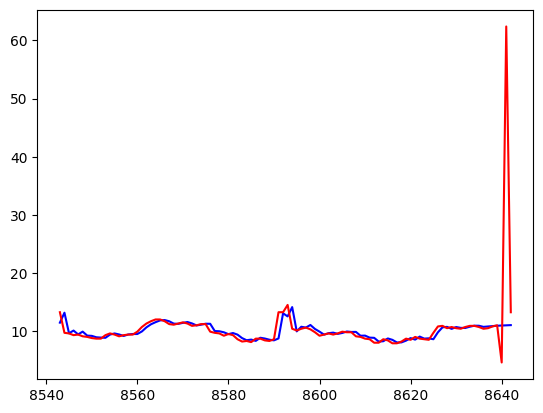

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


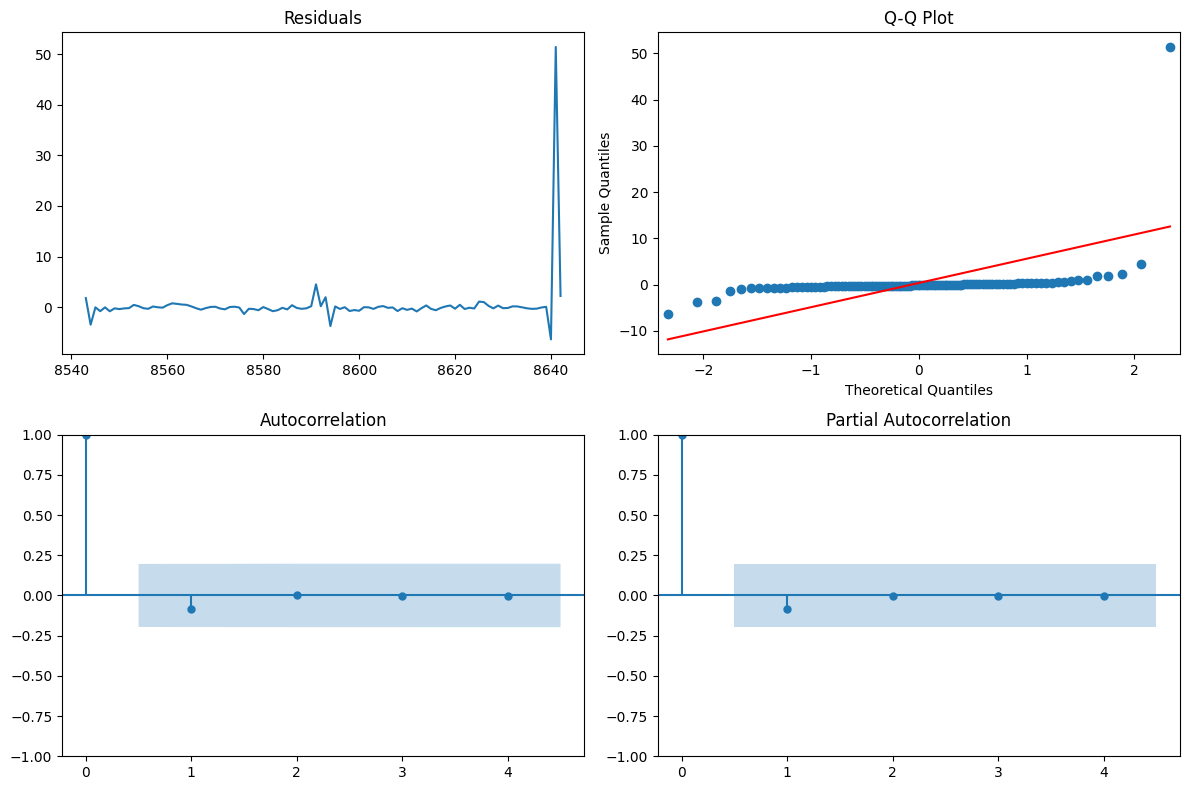

Mean : 13.247534
Root Mean Squared Error : 5.251276
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)   No. Observations:                 8636
Model:                                                         AutoReg(2)   Log Likelihood              -28560.482
Method:                                                   Conditional MLE   S.D. of innovations              6.613
Date:                                                    Wed, 28 Jun 2023   AIC                          57128.964
Time:                                                            03:16:58   BIC                          57157.218
Sample:                                                                 2   HQIC                         57138.598
                                                                     8636                                         
                            

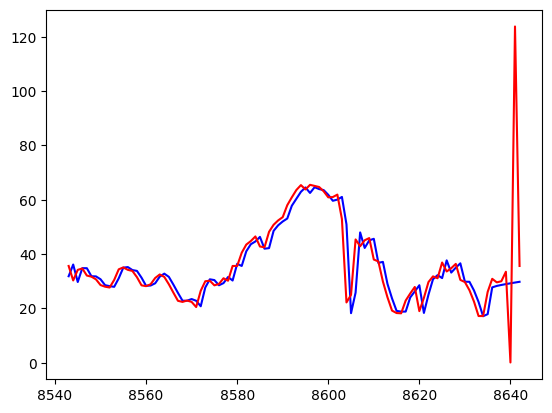

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


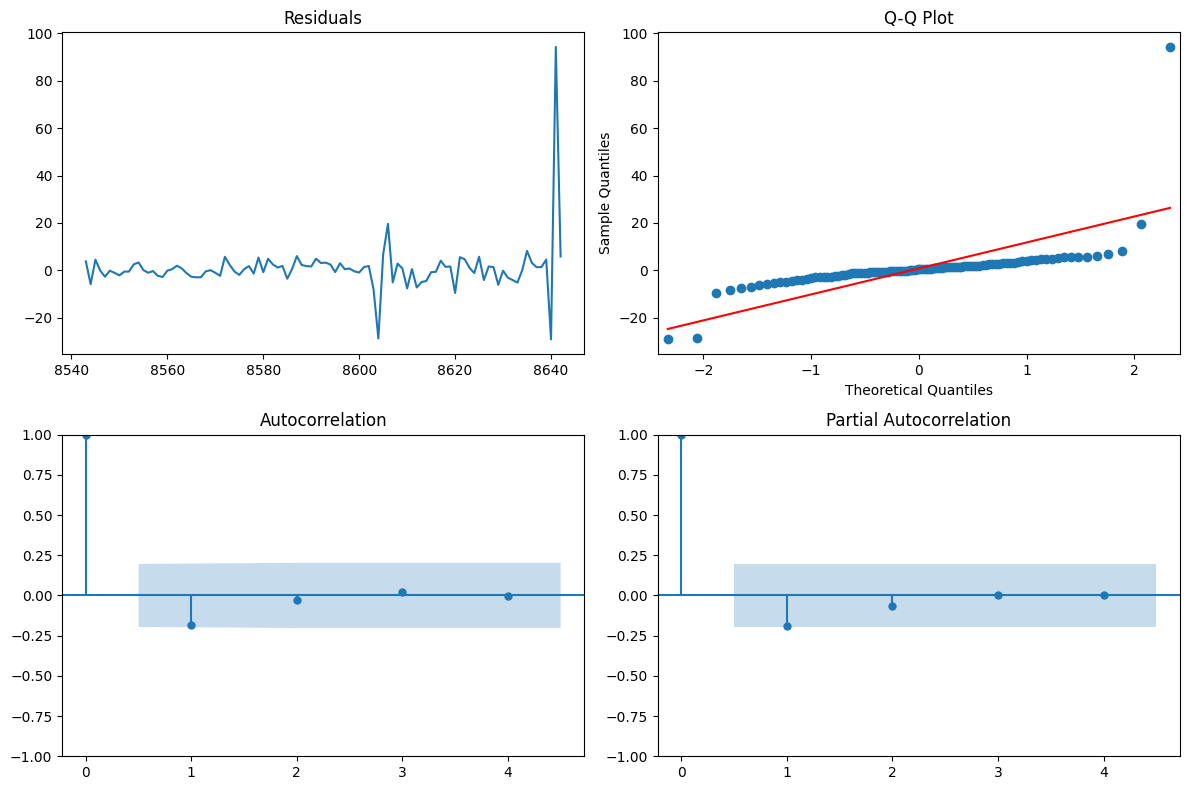

Mean : 35.632958
Root Mean Squared Error : 10.993766
                                               AutoReg Model Results                                                
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)   No. Observations:                 8636
Model:                                                           AutoReg(2)   Log Likelihood               24692.672
Method:                                                     Conditional MLE   S.D. of innovations              0.014
Date:                                                      Wed, 28 Jun 2023   AIC                         -49377.345
Time:                                                              03:16:59   BIC                         -49349.091
Sample:                                                                   2   HQIC                        -49367.711
                                                                       8636                                         
           

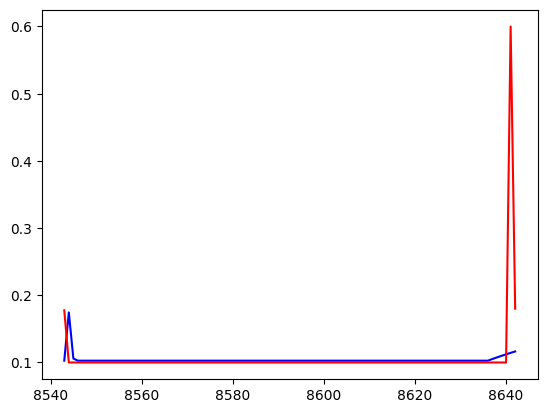

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


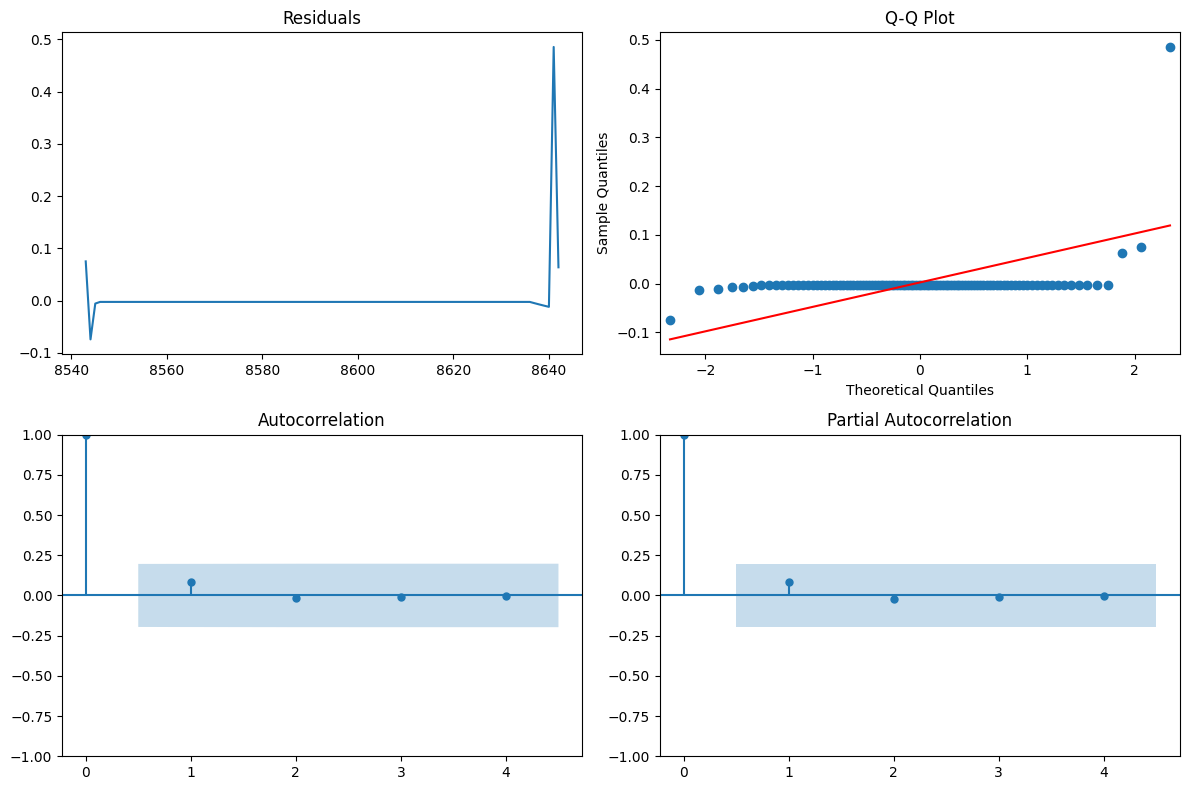

Mean : 0.177647
Root Mean Squared Error : 0.050214


In [ ]:
i=0
for column in column_names[3:]:
    train_data=df[column][:-100]
    test_data=df[column][-100:]
    ar_model=AutoReg(df[column][:-7], lags=lags[i]).fit()
    print(ar_model.summary())
    pred = ar_model.predict(start = len(train_data), end = len(df) - 1, dynamic=False)
    plt.plot(pred, color = "blue")
    plt.plot(test_data, color = "red")
    plt.show()
    ar_residuals=test_data-pred
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes[0, 0].plot(ar_residuals)
    axes[0, 0].set_title('Residuals')
    sm.qqplot(ar_residuals, line='s', ax=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot')
    sm.graphics.tsa.plot_acf(ar_residuals, lags=4, ax=axes[1, 0])
    axes[1, 0].set_title('Autocorrelation')
    sm.graphics.tsa.plot_pacf(ar_residuals, lags=4, ax=axes[1, 1])
    axes[1, 1].set_title('Partial Autocorrelation')
    plt.tight_layout()
    plt.show()
    rmse = math.sqrt(mean_squared_error(pred, test_data))
    mean = df[column].mean()
    print("Mean : %f" % mean)
    print("Root Mean Squared Error : %f" %rmse)
    i+=1

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


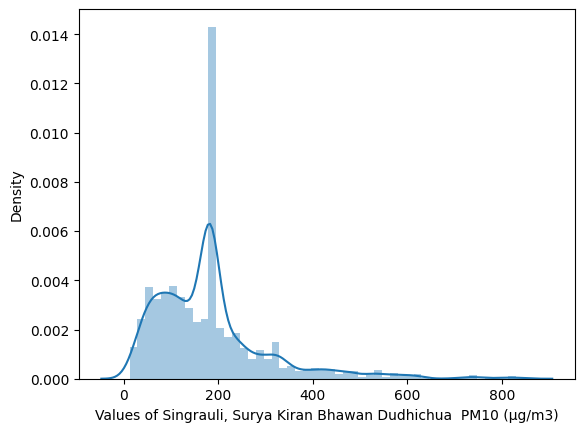

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


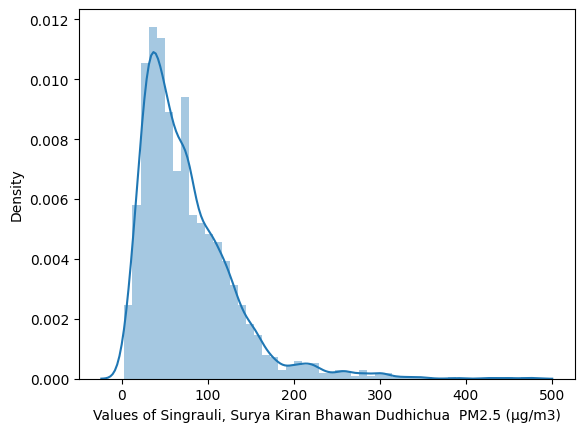

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


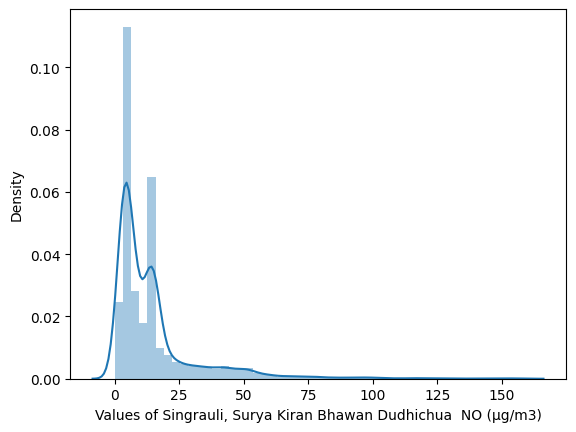

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


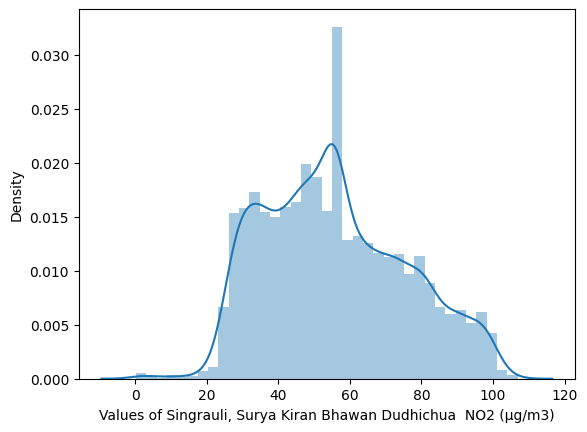

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


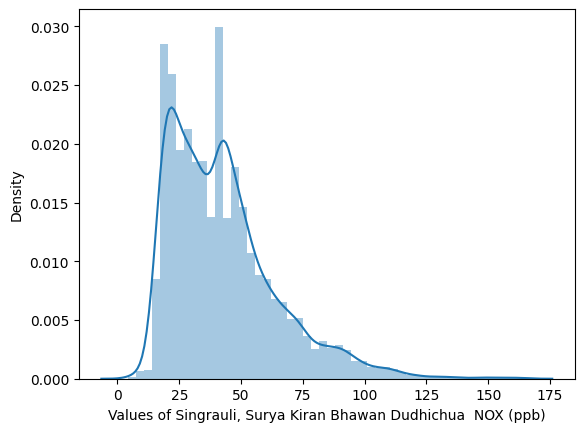

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


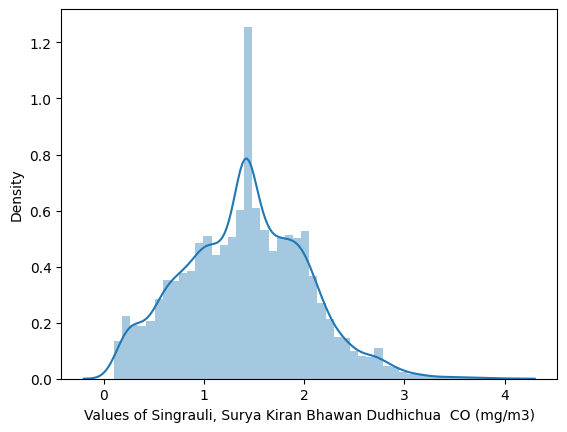

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


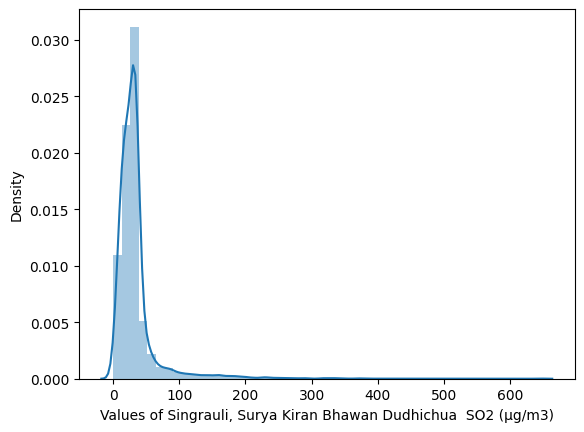

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


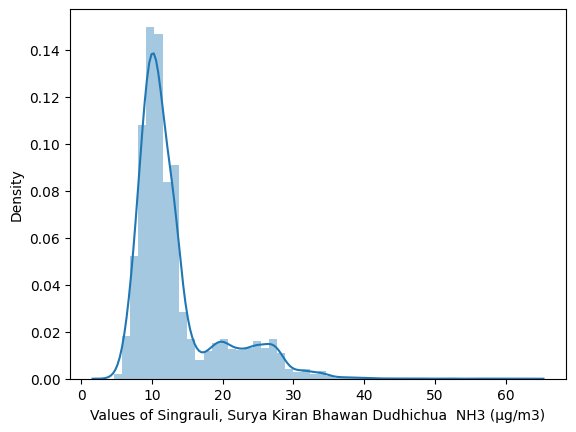

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


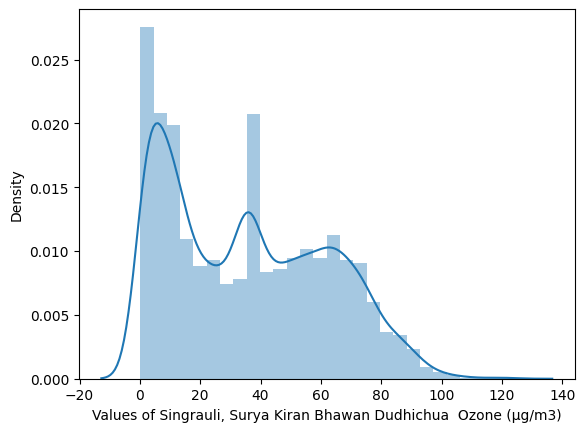

<ipython-input-12-f0a8e43f7859>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


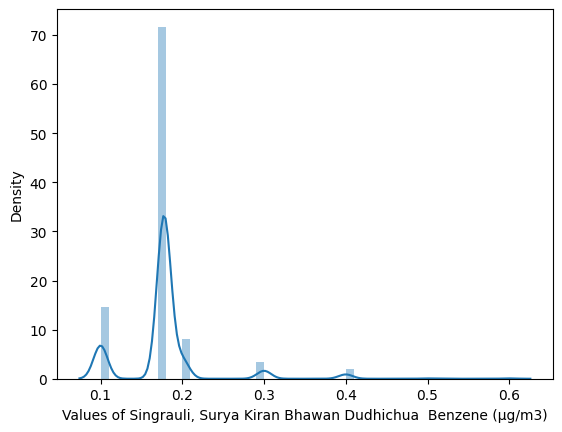

In [ ]:
for column in column_names[3:]:
  sns.distplot(df[column])
  plt.xlabel('Values of '+column)
  plt.ylabel('Density')
  plt.show()

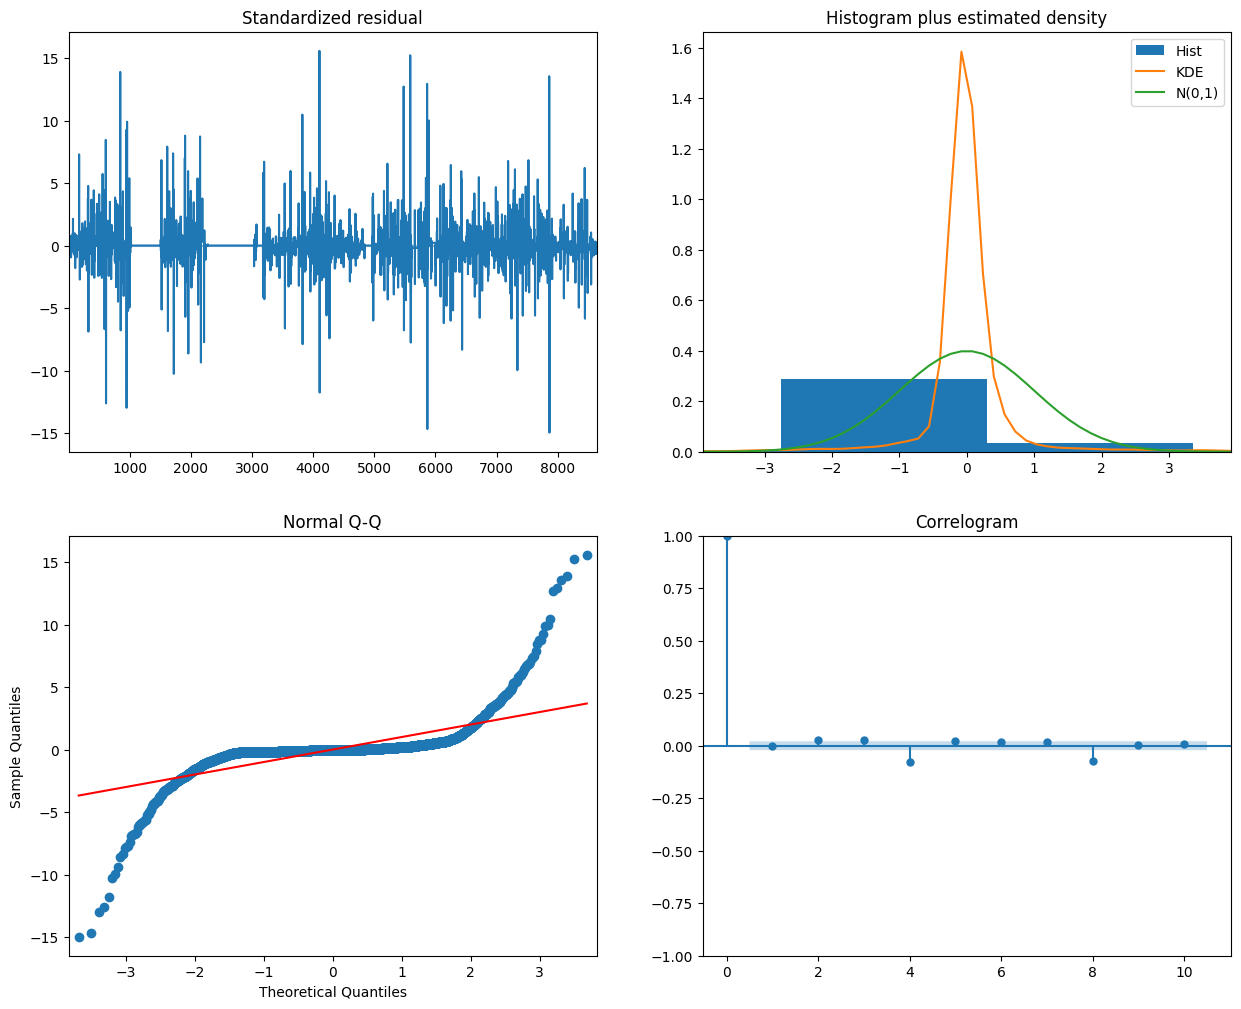

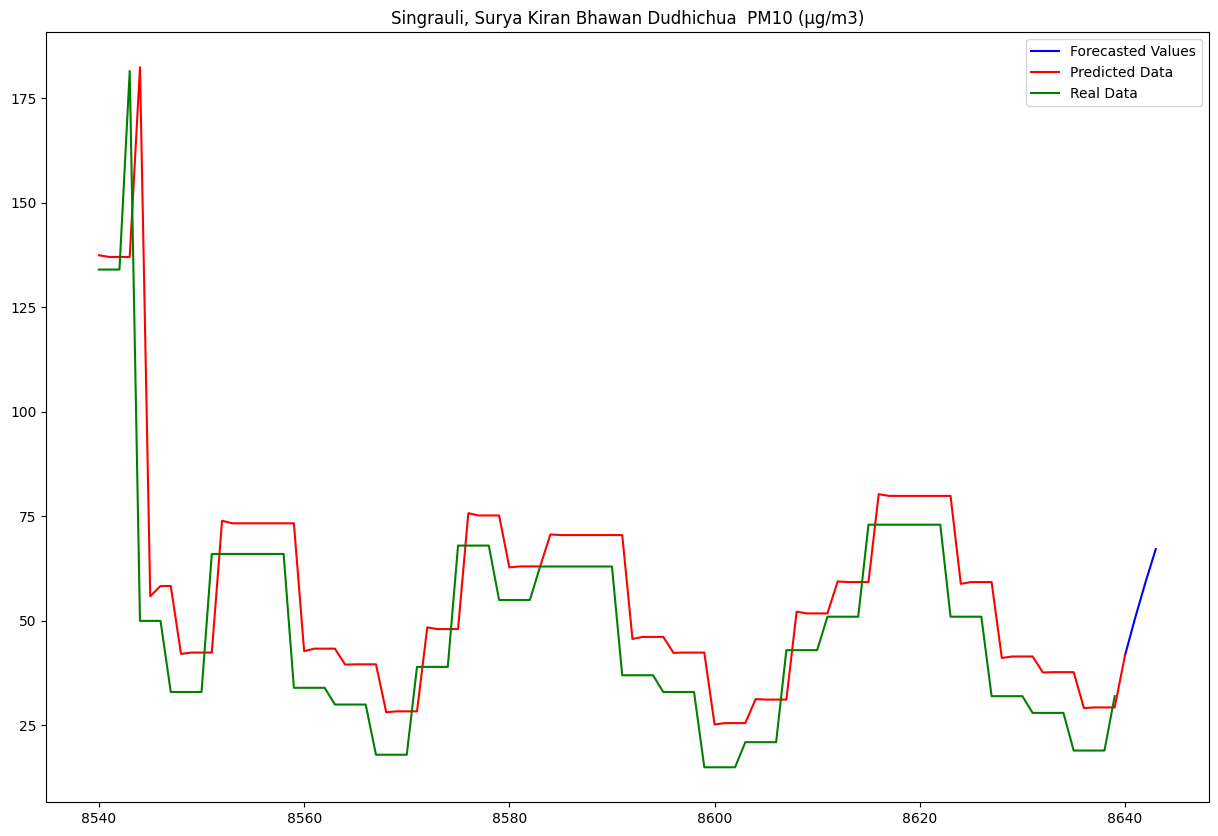

Mean Absolute Error: 339.48410172266847
Root Mean Squared Error: 18.425094347727732


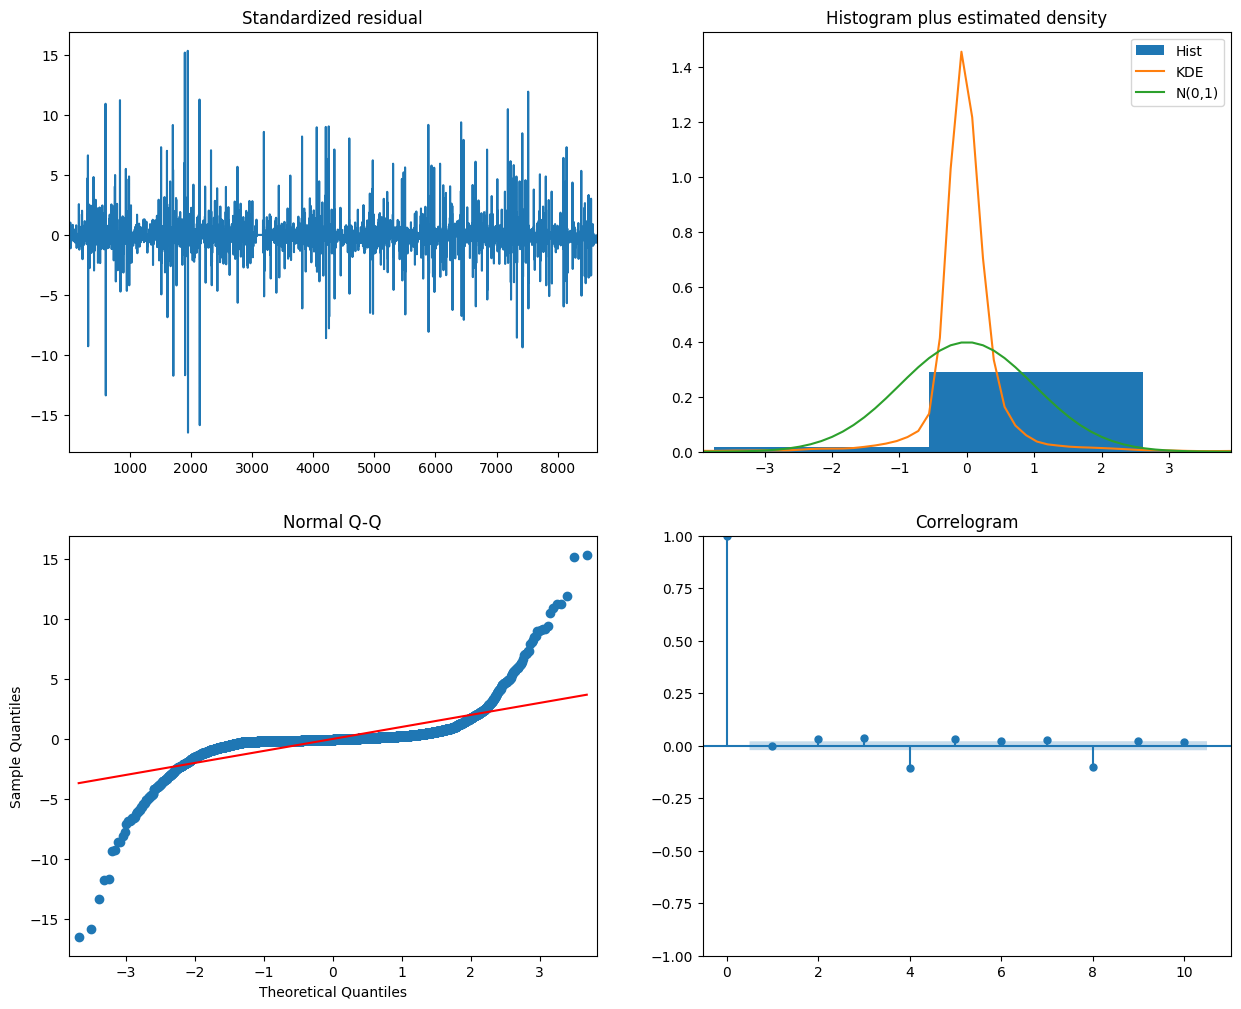

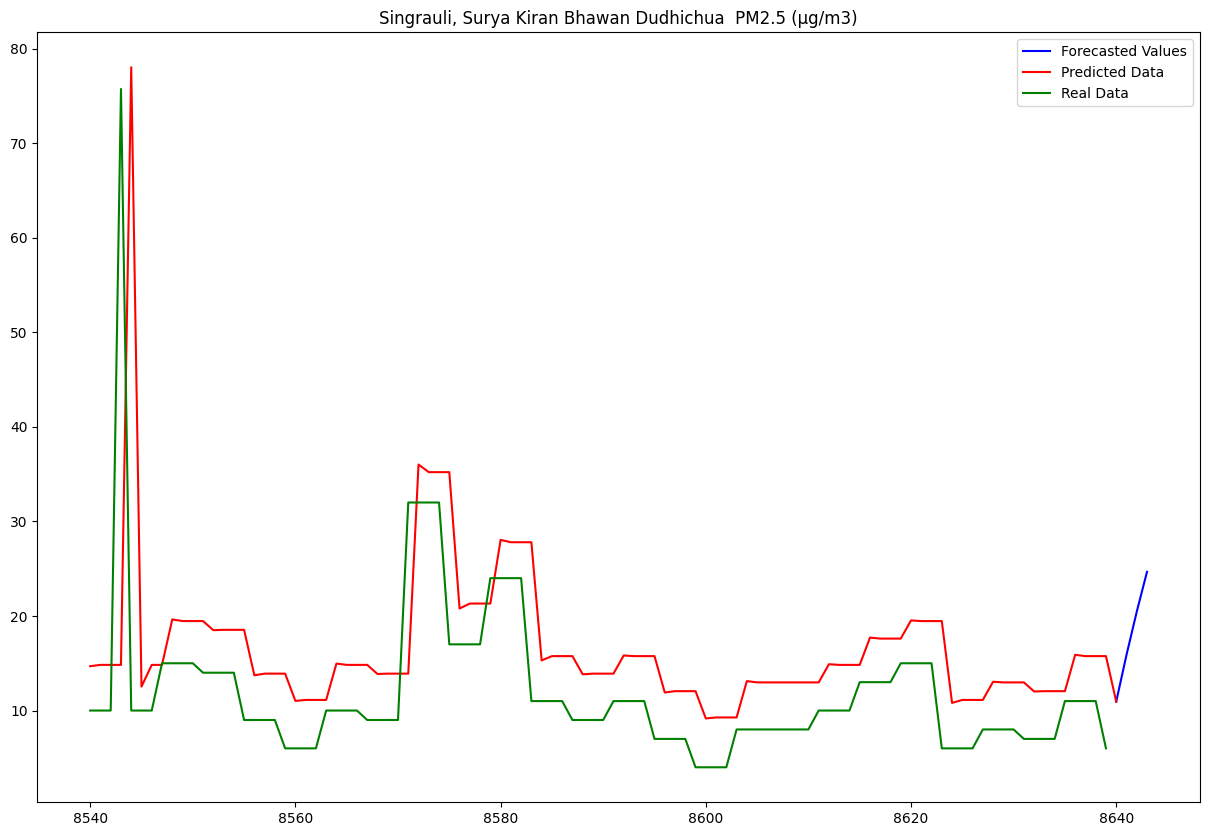

Mean Absolute Error: 117.14783976232256
Root Mean Squared Error: 10.82348556437909


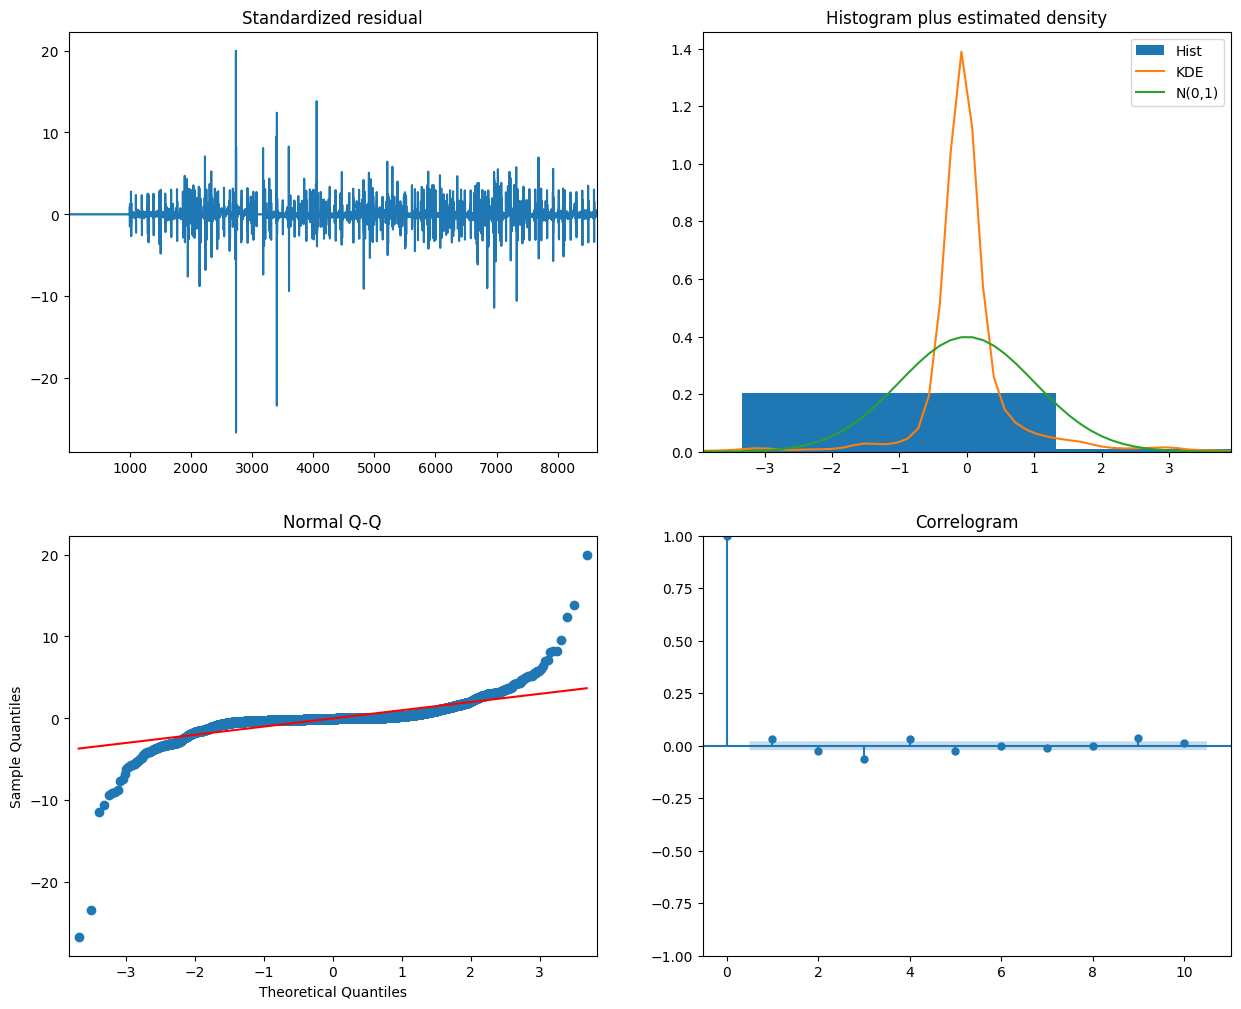

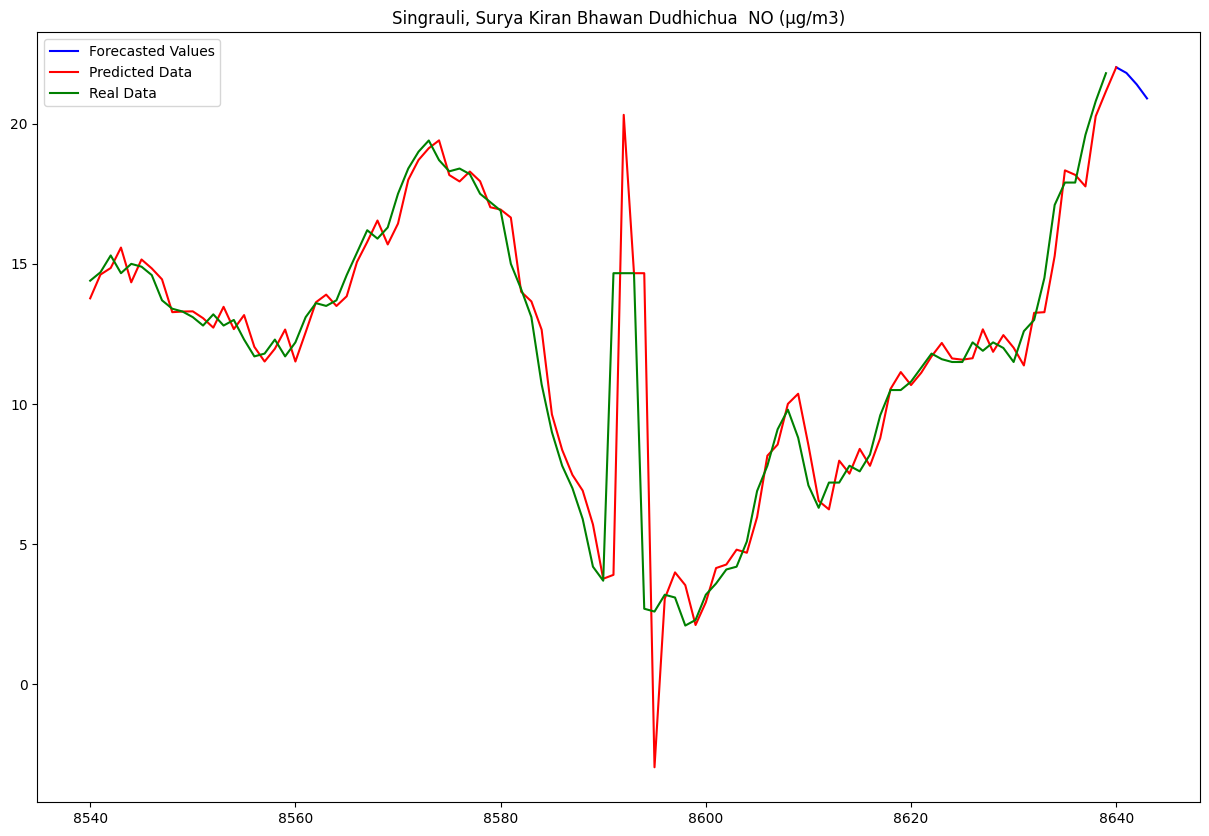

Mean Absolute Error: 3.6915458679425965
Root Mean Squared Error: 1.9213396024499667


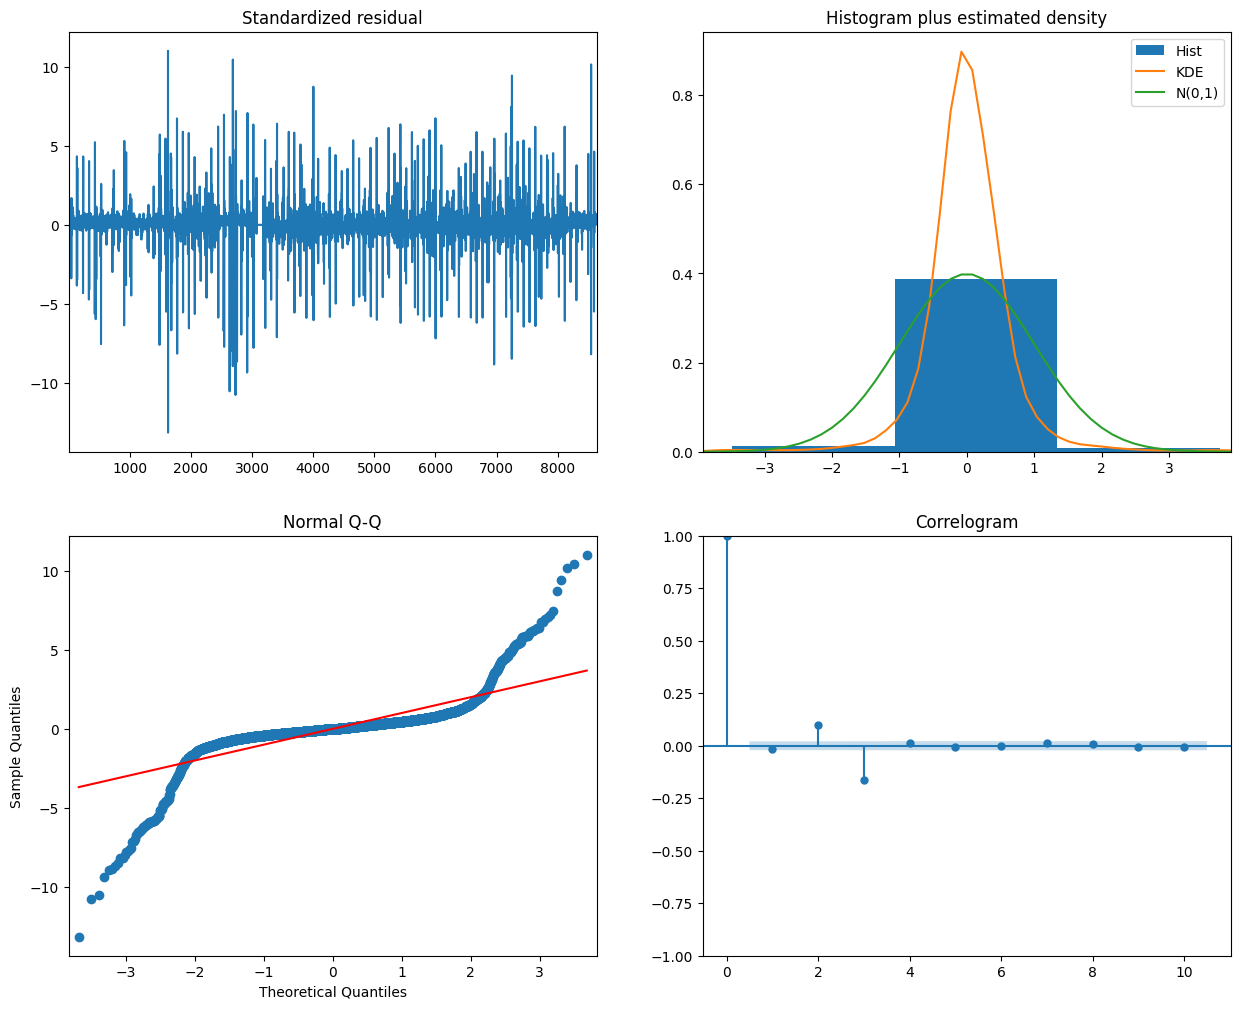

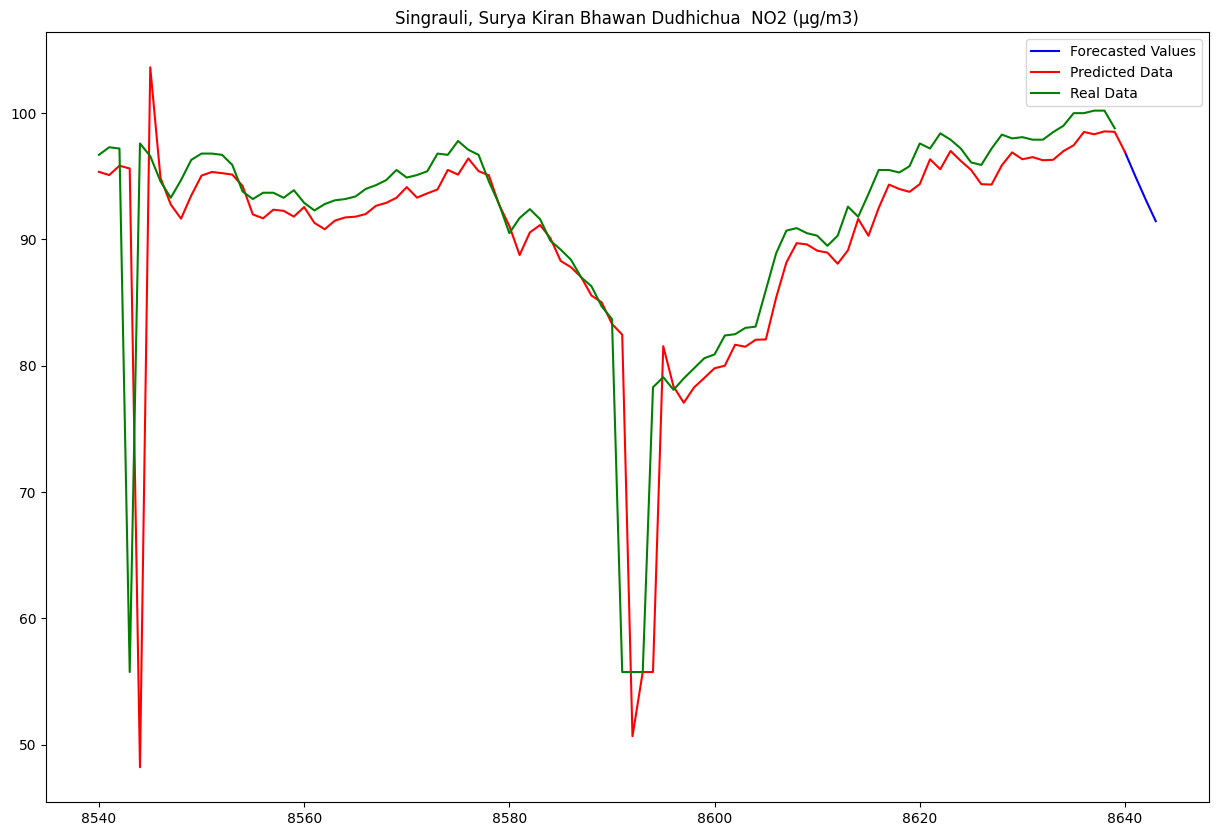

Mean Absolute Error: 56.16023924671195
Root Mean Squared Error: 7.494013560617031


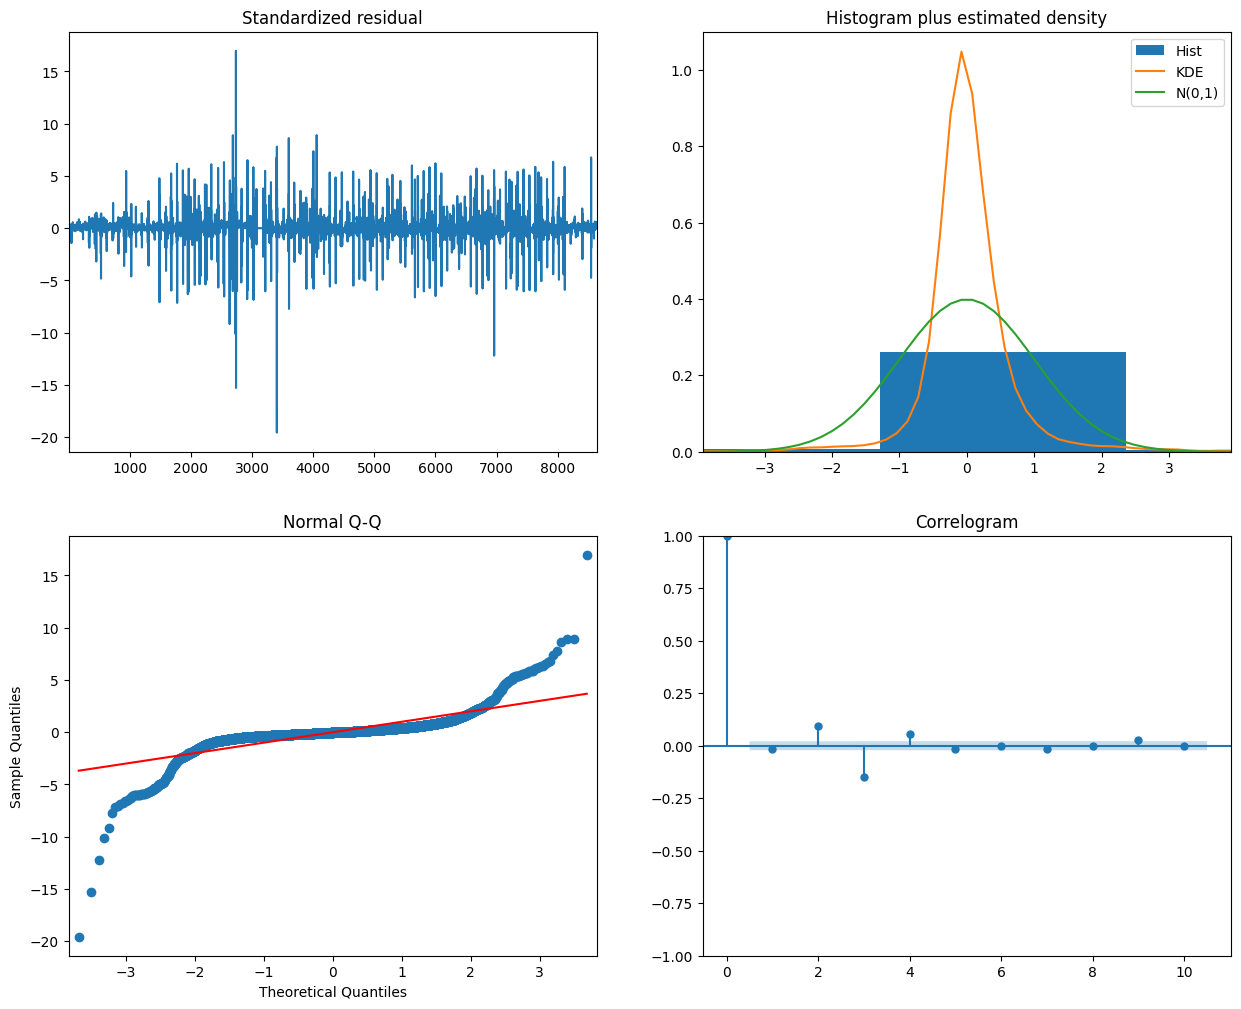

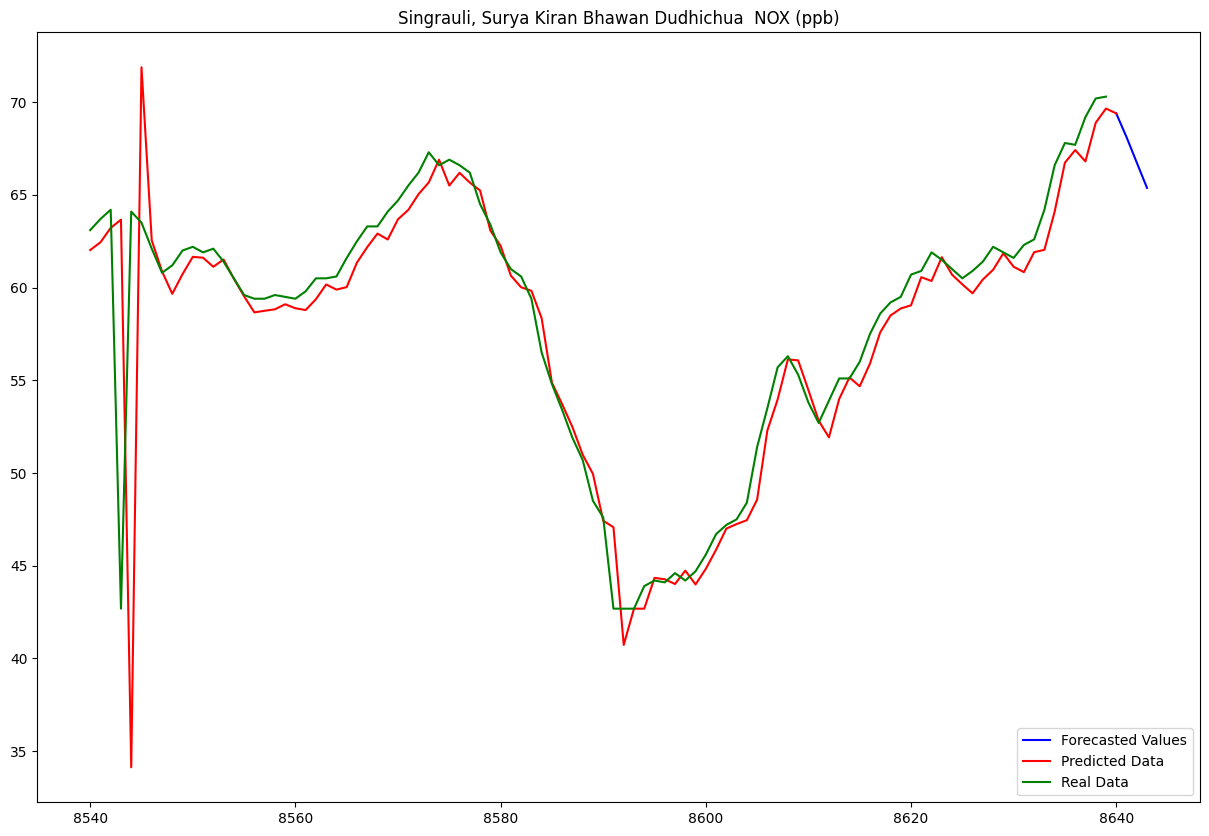

Mean Absolute Error: 15.323961376995022
Root Mean Squared Error: 3.9145831677197793


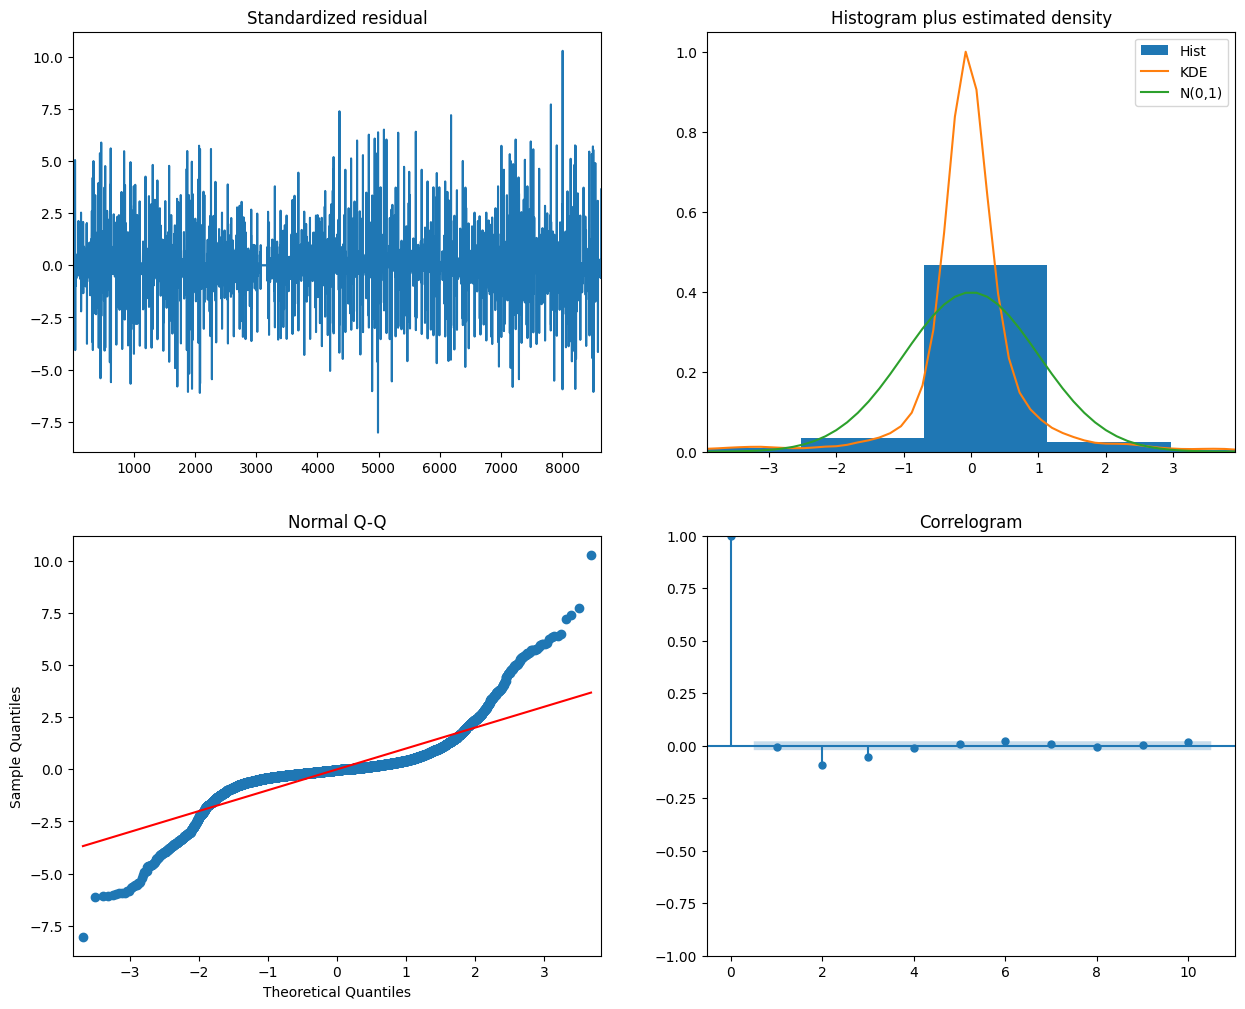

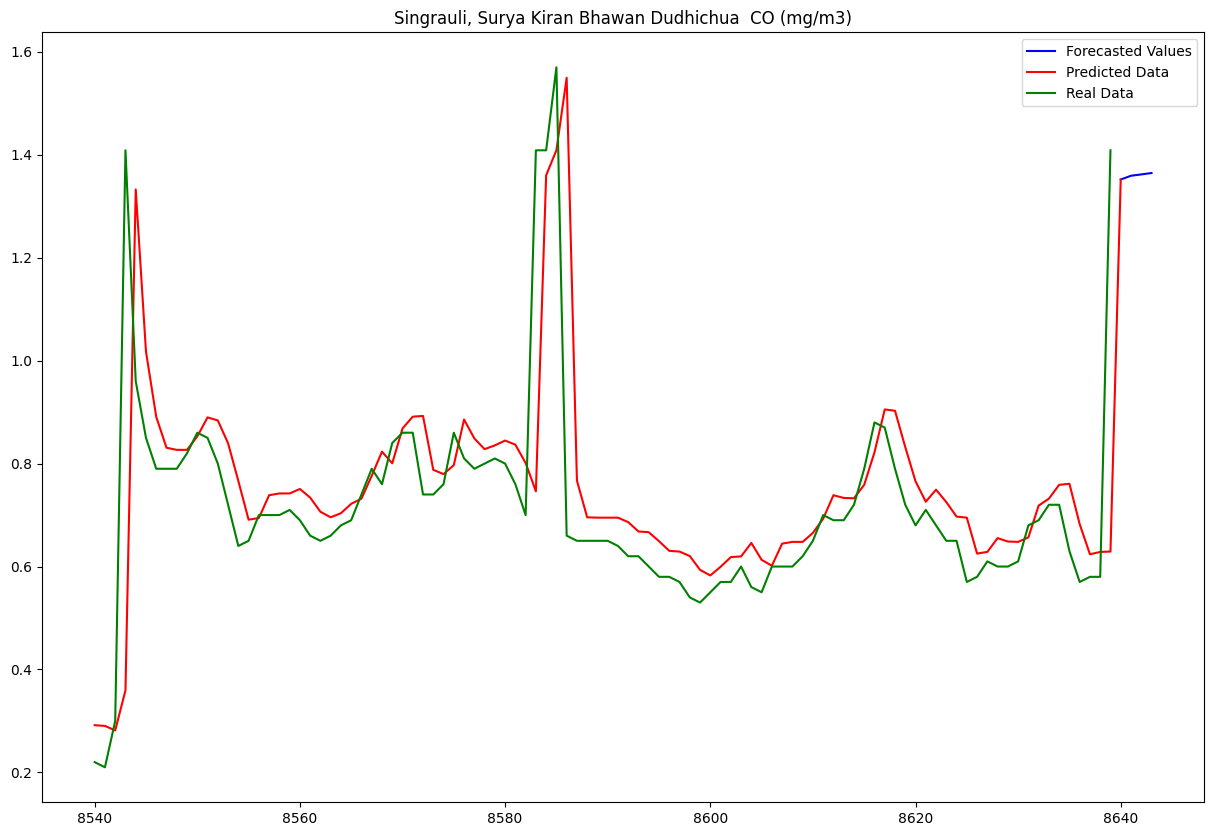

Mean Absolute Error: 0.0347895466301094
Root Mean Squared Error: 0.18651956098519373


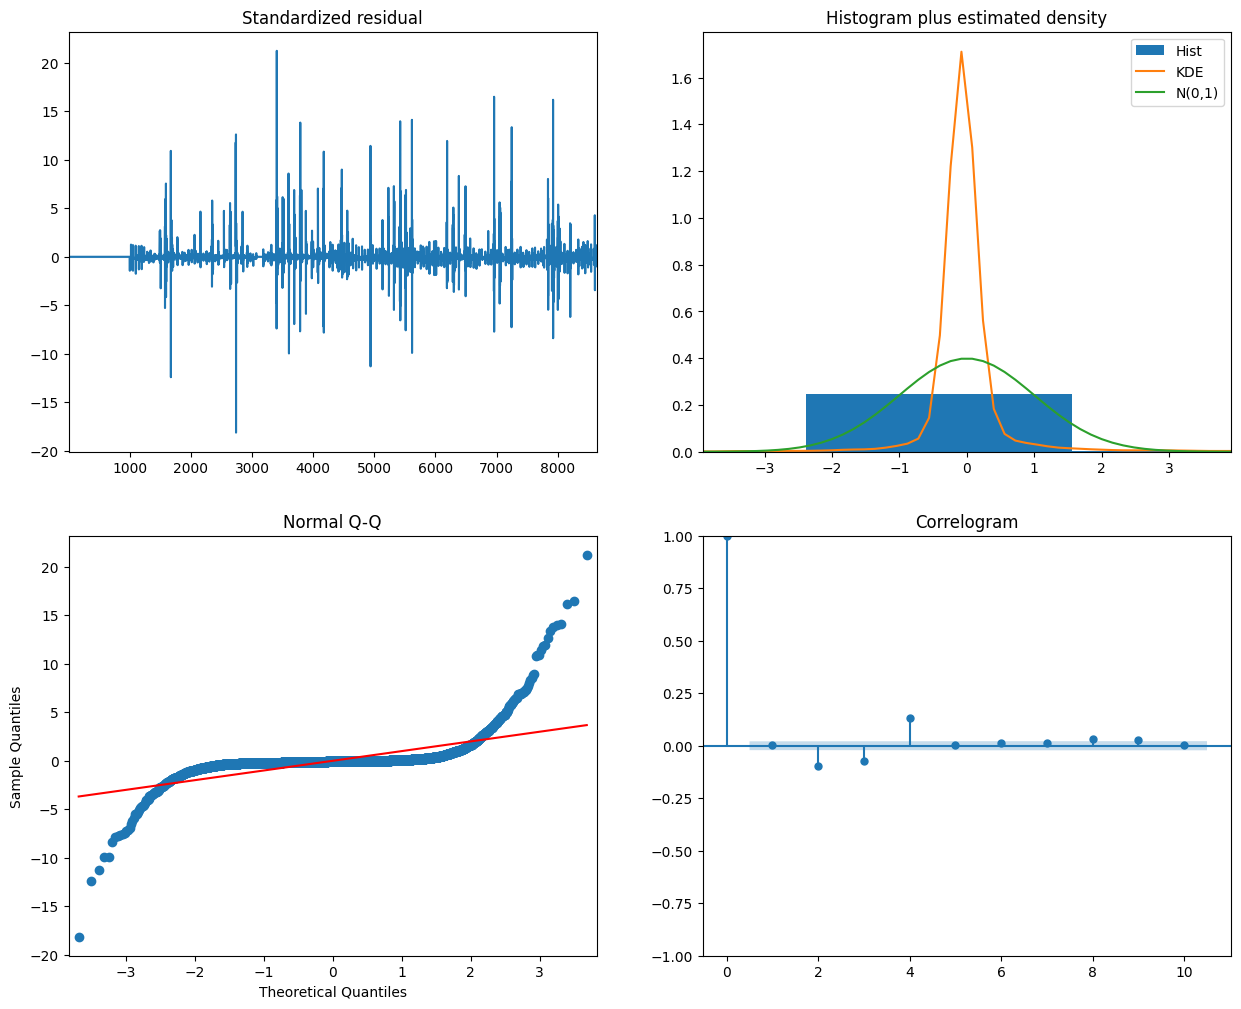

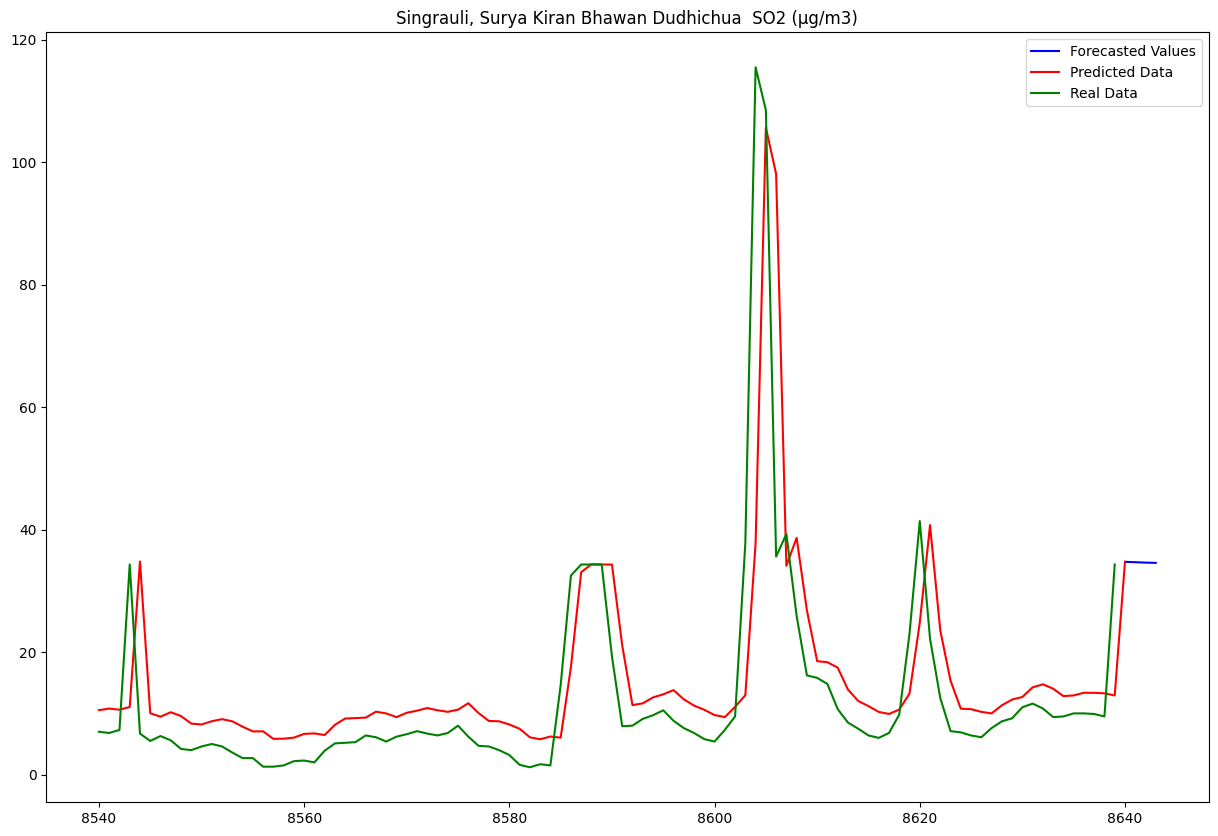

Mean Absolute Error: 155.34485802029565
Root Mean Squared Error: 12.463741734338676


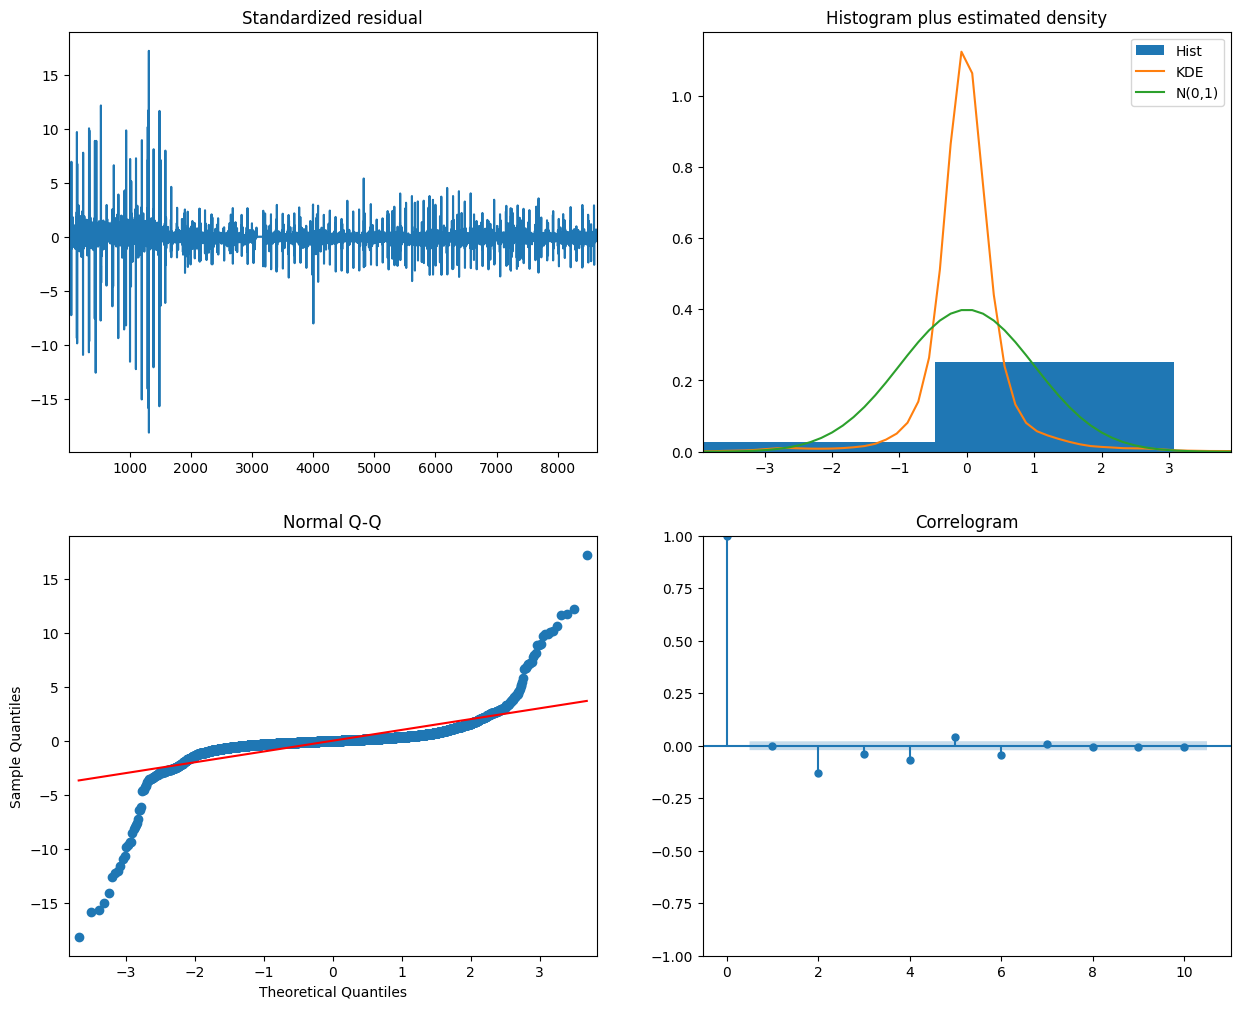

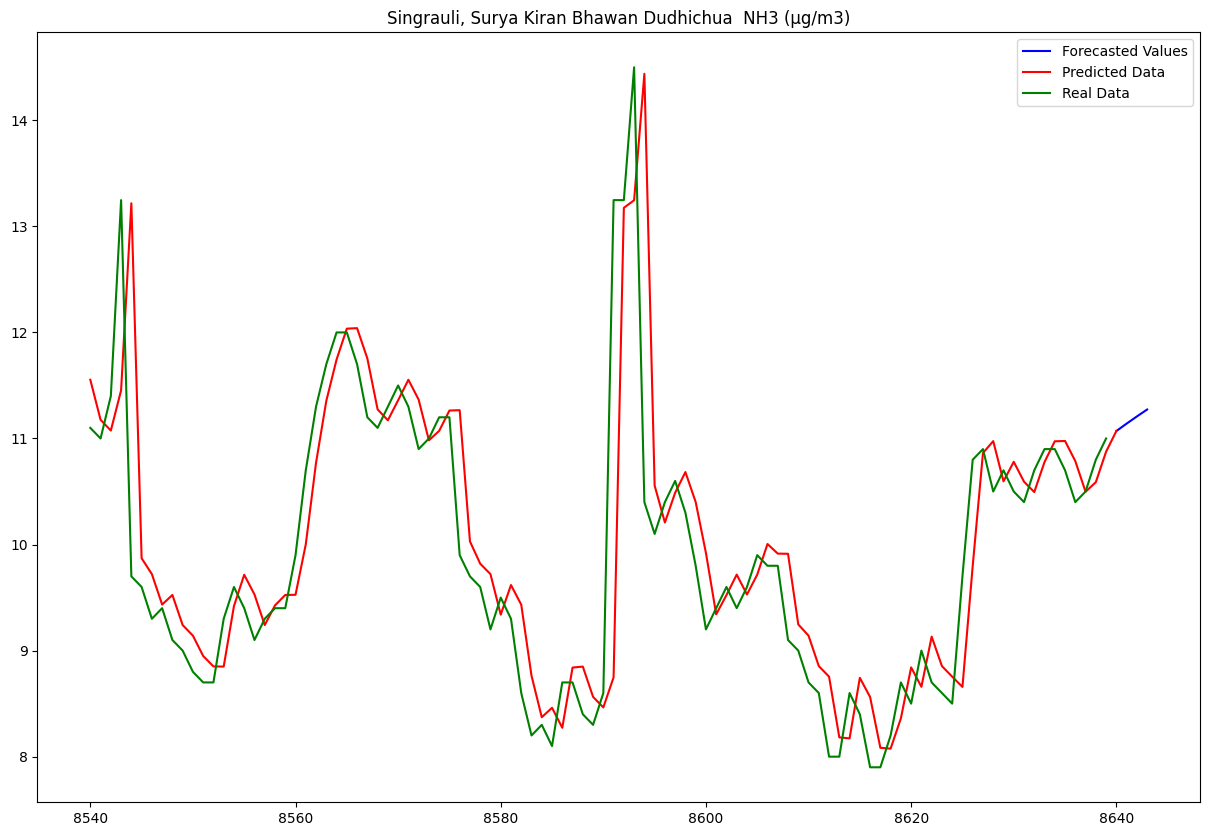

Mean Absolute Error: 0.6856057979658061
Root Mean Squared Error: 0.8280131629182027


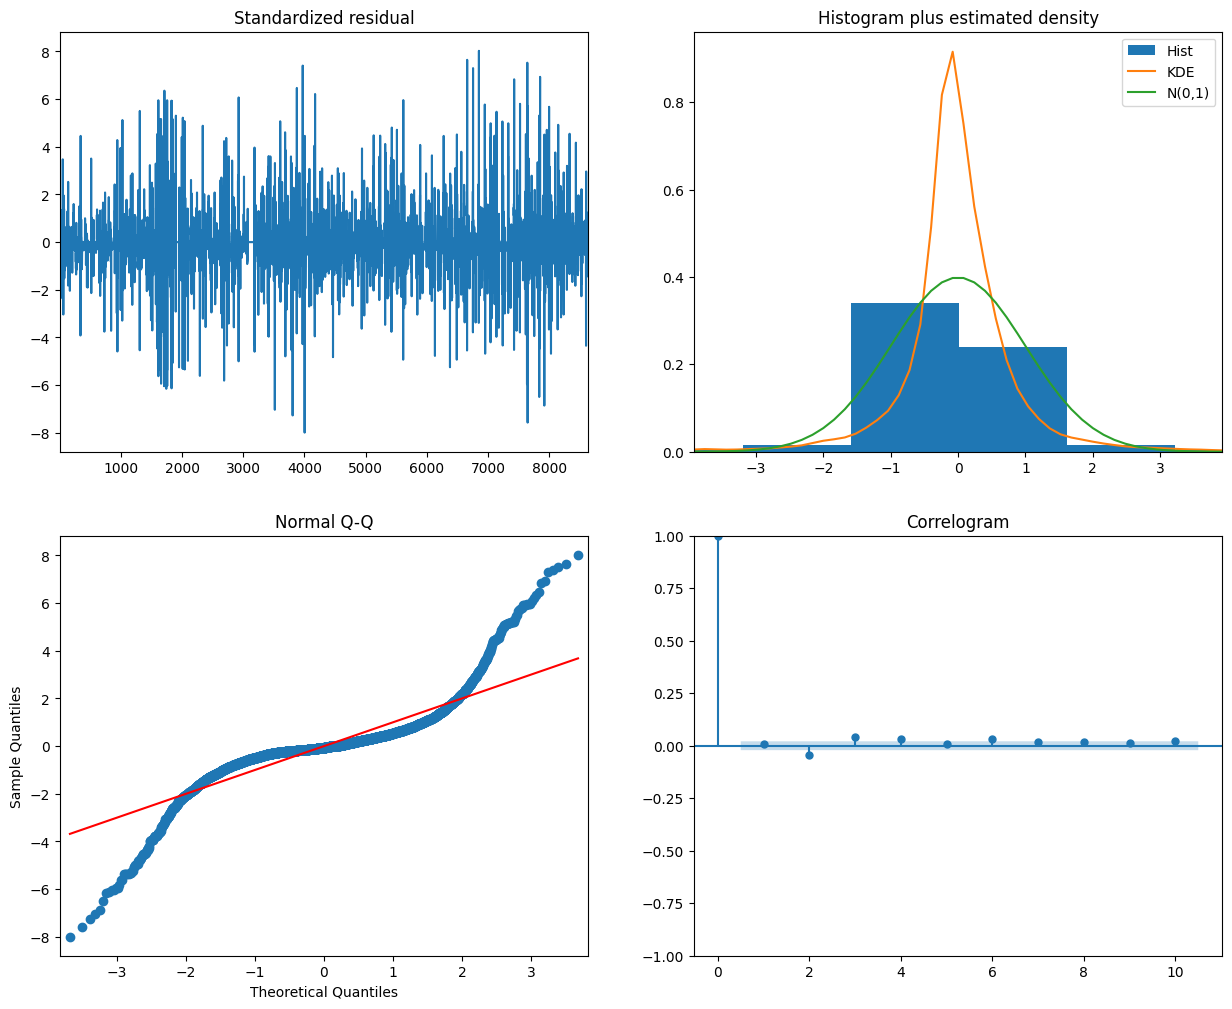

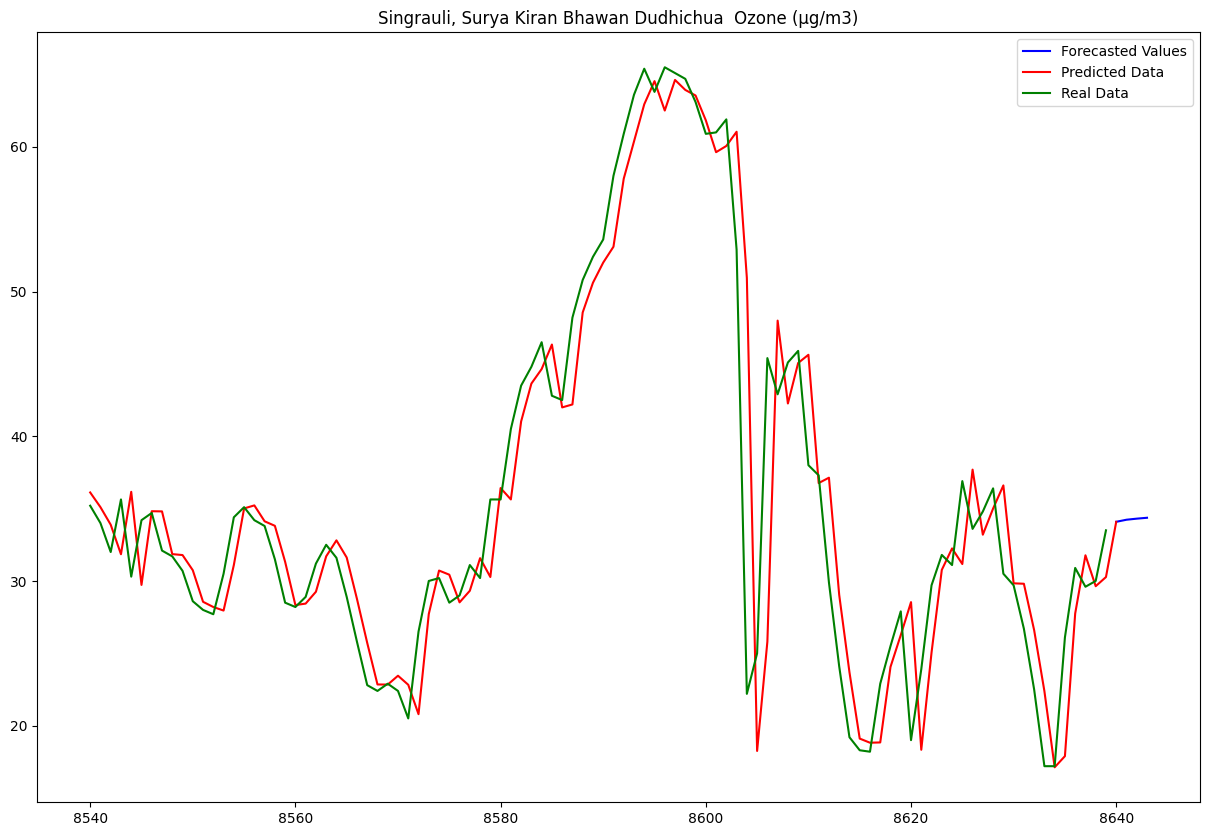

Mean Absolute Error: 23.125867778061497
Root Mean Squared Error: 4.808936241837845


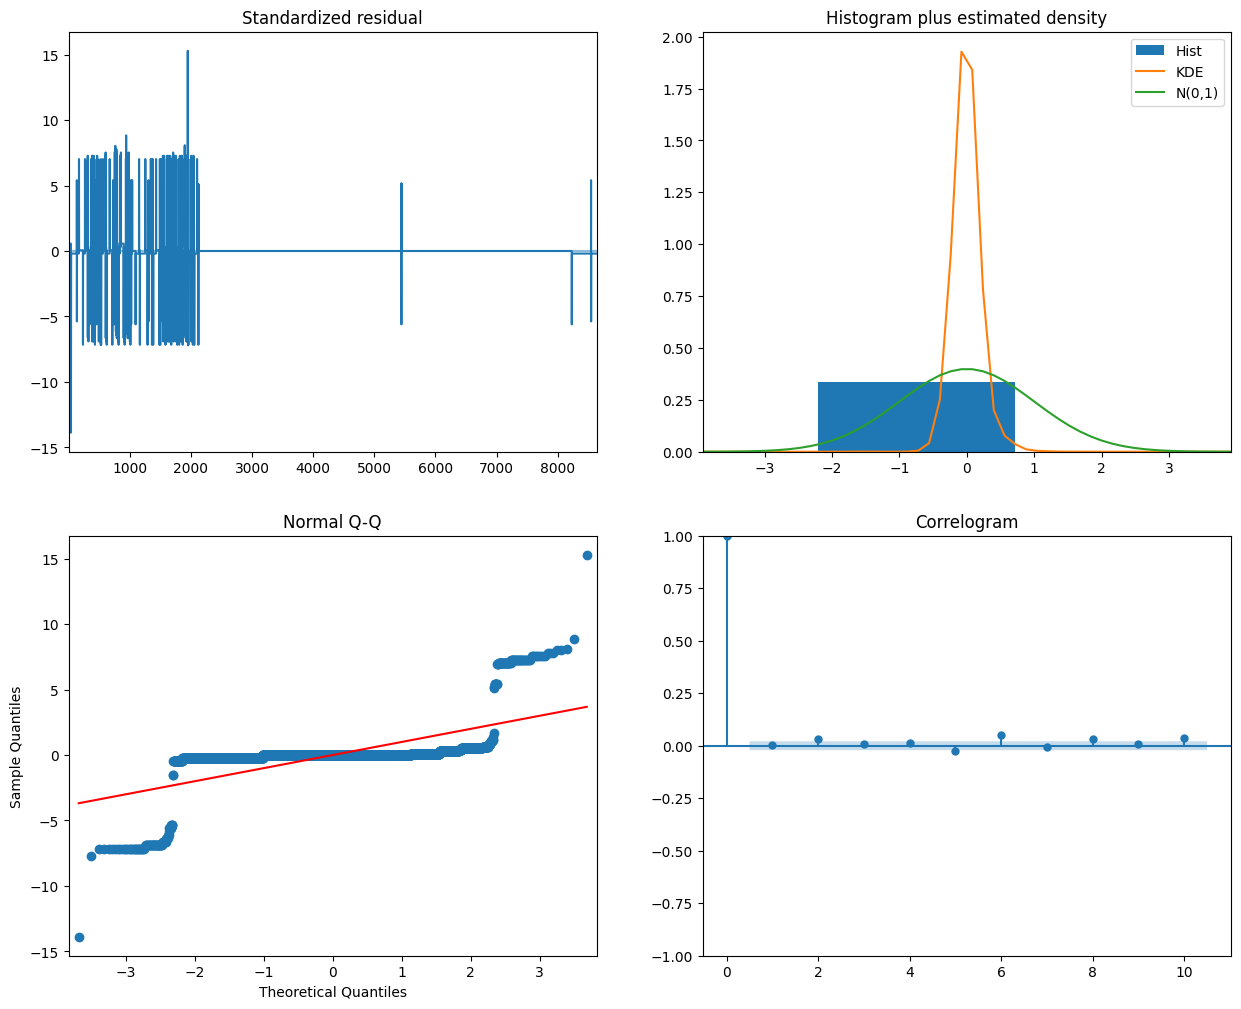

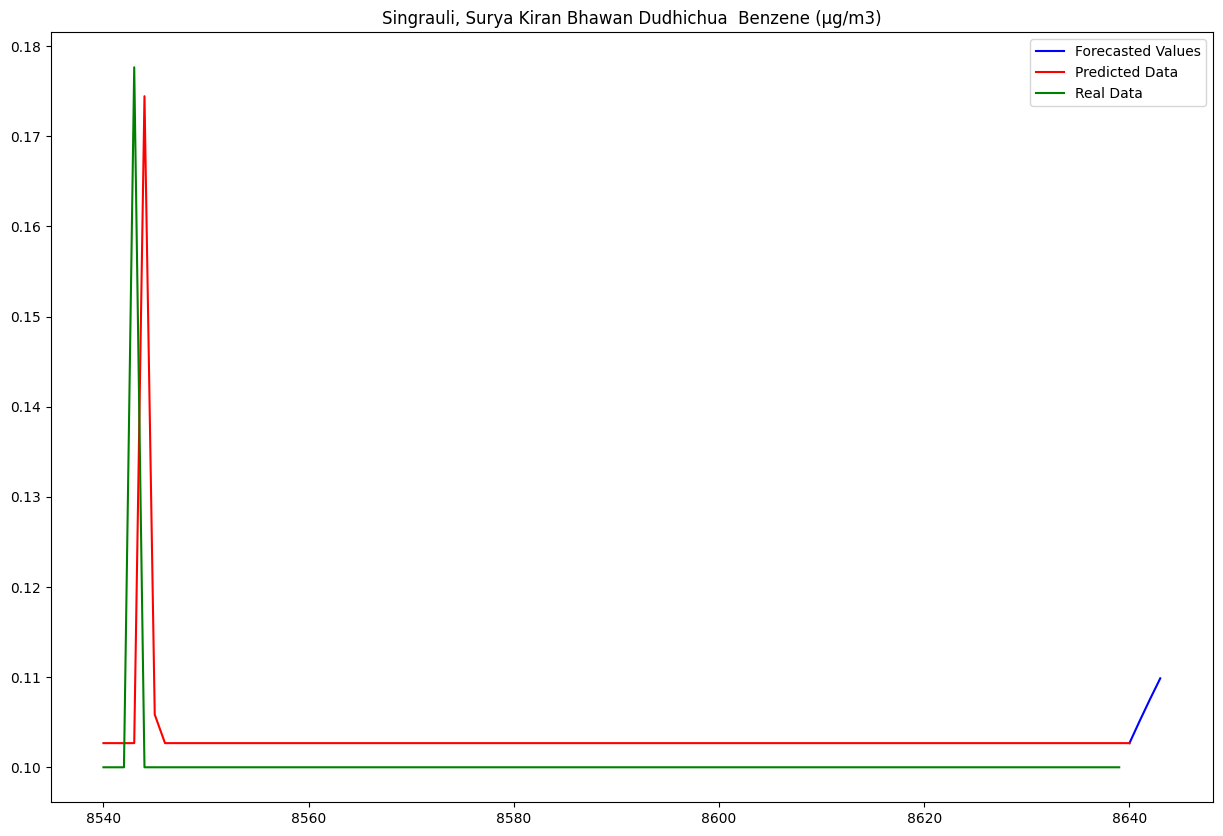

Mean Absolute Error: 0.00011891763220975853
Root Mean Squared Error: 0.010904936139646052


In [ ]:
from sklearn.metrics import mean_absolute_error
for column in column_names[3:]:
  data=df[column][:8640]
  train_data=data[:-100]
  test_data=data[-100:]
  ar_model=AutoReg(data, lags=2).fit()
  ar_model.plot_diagnostics(figsize=(15, 12))
  plt.show()
  pred=ar_model.predict(start=len(train_data), end=len(data), dynamic=False)
  forecast=ar_model.predict(start=len(data), end=len(data)+3, dynamic=False)
  plt.figure(figsize=(15,10))
  plt.title(column)
  plt.plot(forecast, color="blue", label="Forecasted Values")
  plt.plot(pred, color="red", label="Predicted Data")
  plt.plot(test_data, color="green", label="Real Data")
  plt.legend()
  plt.show()
  pred=ar_model.predict(start=len(train_data), end=len(data)-1, dynamic=False)
  rmse=math.sqrt(mean_squared_error(pred, test_data))
  mean=data.mean()
  print("Mean Absolute Error:", mean_squared_error(pred, test_data))
  print("Root Mean Squared Error:", rmse)